# DATA COLLECTION

In [6]:
#libraries
import pandas as pd 
import numpy as np
import pip
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy.stats as stats
import random

from scipy.stats import shapiro

In [7]:
path = "./dataset_project_eHealth20252026.csv"
dataset = pd.read_csv(path)
dataset.head(5)

FileNotFoundError: [Errno 2] No such file or directory: './dataset_project_eHealth20252026.csv'

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 96 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        220 non-null    float64
 1   gender     221 non-null    int64  
 2   education  220 non-null    float64
 3   marital    220 non-null    float64
 4   income     221 non-null    int64  
 5   audit_1    221 non-null    int64  
 6   audit_2    221 non-null    int64  
 7   audit_3    220 non-null    float64
 8   audit_4    221 non-null    int64  
 9   audit_5    220 non-null    float64
 10  audit_6    221 non-null    int64  
 11  audit_7    220 non-null    float64
 12  audit_8    220 non-null    float64
 13  audit_9    220 non-null    float64
 14  audit_10   219 non-null    float64
 15  dast_1     221 non-null    int64  
 16  dast_2     219 non-null    float64
 17  dast_3     220 non-null    float64
 18  dast_4     221 non-null    int64  
 19  dast_5     220 non-null    float64
 20  dast_6    

In [4]:
df = pd.DataFrame(dataset) #dataframe creation

In [5]:
print("Elenco colonne del dataset:")
for i, col in enumerate(df.columns):
    print(f"{i+1:02d}: {col}")

Elenco colonne del dataset:
01: age
02: gender
03: education
04: marital
05: income
06: audit_1
07: audit_2
08: audit_3
09: audit_4
10: audit_5
11: audit_6
12: audit_7
13: audit_8
14: audit_9
15: audit_10
16: dast_1
17: dast_2
18: dast_3
19: dast_4
20: dast_5
21: dast_6
22: dast_7
23: dast_8
24: dast_9
25: dast_10
26: pgsi_1
27: pgsi_2
28: pgsi_3
29: pgsi_4
30: pgsi_5
31: pgsi_6
32: pgsi_7
33: pgsi_8
34: pgsi_9
35: iat_1
36: iat_2
37: iat_3
38: iat_4
39: iat_5
40: iat_6
41: iat_7
42: iat_8
43: iat_9
44: iat_10
45: iat_11
46: iat_12
47: iat_13
48: iat_14
49: iat_15
50: iat_16
51: iat_17
52: iat_18
53: iat_19
54: iat_20
55: pcl5_1
56: pcl5_2
57: pcl5_3
58: pcl5_4
59: pcl5_5
60: pcl5_6
61: pcl5_7
62: pcl5_8
63: pcl5_9
64: pcl5_10
65: pcl5_11
66: pcl5_12
67: pcl5_13
68: pcl5_14
69: pcl5_15
70: pcl5_16
71: pcl5_17
72: pcl5_18
73: pcl5_19
74: pcl5_20
75: mspss_1
76: mspss_2
77: mspss_3
78: mspss_4
79: mspss_5
80: mspss_6
81: mspss_7
82: mspss_8
83: mspss_9
84: mspss_10
85: mspss_11
86: mspss

The dataset has 221 rows and 96 columns.

# DATA CLEANING

Deletion of duplicated rows.

In [6]:
df.duplicated() #check for duplicated rows and delete them

0      False
1      False
2      False
3      False
4      False
       ...  
216     True
217     True
218     True
219     True
220     True
Length: 221, dtype: bool

In [7]:
df.drop_duplicates()

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,1,1,0.0,0,0.0,...,4,1.0,4.0,0.0,0,0.0,3,3.0,3.0,1.0
196,21.0,0,18.0,1.0,38000,1,1,1.0,0,1.0,...,4,4.0,4.0,4.0,3,3.0,3,2.0,0.0,3.0
197,20.0,1,22.0,4.0,50000,2,2,0.0,2,1.0,...,7,7.0,7.0,1.0,7,3.0,5,5.0,5.0,3.0
198,39.0,0,8.0,1.0,22000,0,4,3.0,2,0.0,...,0,4.0,4.0,4.0,1,1.0,0,3.0,2.0,0.0


The deleted rows are 21, the dataset has 200 rows and 96 columns.

Replace all different representations of missing or empty values in the DataFrame (e.g., empty strings, "NA", "N/A", "nan", "missing", None, etc.) with a consistent NaN value recognized by pandas for easier data cleaning and analysis.

In [8]:
df = df.replace(
    ["", " ", "NA", "N/A", "na", "NaN", "nan", "missing", "None", None, pd.NaT, pd.NA],
    np.nan
)

Univariate imputation strategy that replaces missing values according to the statistical properties and data type of each variable. Specifically:
- Likert scale or continuous variables:
    - If the distribution is approximately symmetric (|skew| ≤ 0.5), missing values are replaced with the mean.
    - Otherwise (skewed distributions), they are replaced with the median.
- Categorical variables (e.g., gender, education, marital): missing values are filled using the mode (most frequent value).
- Binary variables (1/0): missing values are filled using the mode as well.
- Label columns (ending with "_label" or "_labels") are excluded from imputation to preserve their original meaning.

Before imputation, any "null-like" string values (e.g., "NA", "", "None") are normalized to np.nan to ensure consistent handling of missing data.

The algorithm follows these main steps:
1. Identification of variable types (labels, categorical, binary, numeric);
2. Conversion of numerical candidates to numeric format;
3. Computation of skewness for numeric variables to guide the imputation rule;
4. Application of mode imputation for categorical and binary columns;
5. Generation of a report summarizing the imputation decisions, including the chosen method (mean, median, or mode), the computed skewness, and the number of missing values replaced per variable.


In [9]:
# ===========================================
# Imputazione basata su simmetria (skewness)
# - Likert/continue: mean se |skew|<=0.5, altrimenti median
# - Categoriali codificate: moda
# - Binari (0/1): moda
# - Labels: non toccare
# - Normalizza null stringhe prima
# ===========================================

# helper
def safe_mode(s):
    m = s.mode(dropna=True)
    return m.iloc[0] if len(m) else np.nan

# 1) definisci gruppi noti
label_cols = [c for c in df.columns if c.endswith("_label") or c.endswith("_labels")]
cat_code_cols = [c for c in ["gender", "education", "marital"] if c in df.columns]
binary_cols = [c for c in df.columns if c.startswith("dast_")]  # DAST è 0/1
# aggiungi eventuali altre colonne 0/1 rilevate automaticamente
for c in df.columns:
    if c in binary_cols or c in label_cols:
        continue
    vals = pd.to_numeric(df[c], errors="coerce")
    uniq = set(vals.dropna().unique())
    if uniq.issubset({0, 1}) and c not in binary_cols:
        binary_cols.append(c)

# 2) converti in numerico dove serve (senza toccare labels e categoriche codificate)
numeric_candidates = [c for c in df.columns if c not in label_cols]
for c in numeric_candidates:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# 3) report pre
nan_before = df.isna().sum().to_dict()
decisions = []

# 4) imputazioni
# 4a) categoriche codificate -> moda
for c in cat_code_cols:
    if c in df.columns:
        val = safe_mode(df[c])
        df[c] = df[c].fillna(val)
        decisions.append((c, "mode (categorical)"))

# 4b) binari (DAST + auto-0/1) -> moda
for c in binary_cols:
    if c in df.columns and c not in cat_code_cols:
        val = safe_mode(df[c])
        df[c] = df[c].fillna(val)
        decisions.append((c, "mode (binary)"))

# 4c) tutte le altre colonne numeriche -> mean/median in base a skew
for c in df.columns:
    if c in label_cols or c in cat_code_cols or c in binary_cols:
        continue
    # considera solo colonne numeriche reali
    if not pd.api.types.is_numeric_dtype(df[c]):
        continue
    s = df[c].dropna()
    if s.empty:
        continue
    skew = s.skew()  # skewness di Pandas (Fisher-Pearson)
    if np.isfinite(skew) and abs(skew) <= 0.5:
        fill_val = s.mean()
        method = "mean (|skew|<=0.5)"
    else:
        fill_val = s.median()
        method = "median (|skew|>0.5)"
    df[c] = df[c].fillna(fill_val)
    decisions.append((c, f"{method}; skew={skew:.2f}"))

# 5) report post
nan_after = df.isna().sum().to_dict()
fixed_per_col = {c: int(nan_before.get(c,0) - nan_after.get(c,0)) for c in df.columns}

print("=== Imputation decisions (first 30) ===")
for name, how in decisions[:30]:
    print(f"{name:>20} -> {how}")

print("\n=== NaN replaced per column (top 20) ===")
for col, nfix in sorted(fixed_per_col.items(), key=lambda x: x[1], reverse=True)[:20]:
    if nfix > 0:
        print(f"{col:>20}: {nfix}")

print("\nTotale NaN sostituiti:", sum(fixed_per_col.values()))


=== Imputation decisions (first 30) ===
              gender -> mode (categorical)
           education -> mode (categorical)
             marital -> mode (categorical)
              dast_1 -> mode (binary)
              dast_2 -> mode (binary)
              dast_3 -> mode (binary)
              dast_4 -> mode (binary)
              dast_5 -> mode (binary)
              dast_6 -> mode (binary)
              dast_7 -> mode (binary)
              dast_8 -> mode (binary)
              dast_9 -> mode (binary)
             dast_10 -> mode (binary)
                 age -> mean (|skew|<=0.5); skew=0.09
              income -> median (|skew|>0.5); skew=1.09
             audit_1 -> median (|skew|>0.5); skew=1.13
             audit_2 -> median (|skew|>0.5); skew=1.03
             audit_3 -> median (|skew|>0.5); skew=1.05
             audit_4 -> median (|skew|>0.5); skew=1.18
             audit_5 -> median (|skew|>0.5); skew=1.04
             audit_6 -> median (|skew|>0.5); skew=1.13
            

# EDA (Exploratory Data Analysis)

Histograms allow the visualization of data symmetry (skewness), detection of outliers, and verification that no artificial distortions were introduced during imputation.

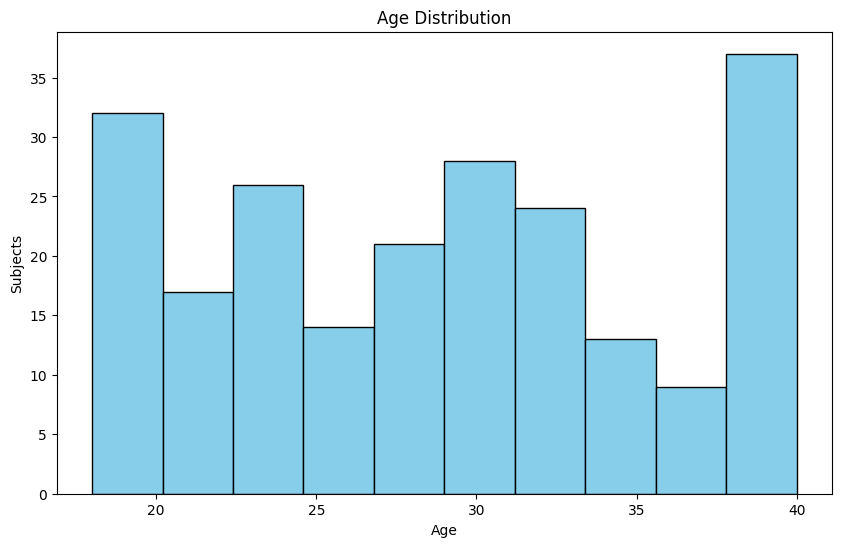

In [29]:
# Histrogram
plt.figure(figsize=(10, 6))
plt.hist(df['age'], color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Subjects')
plt.title('Age Distribution')
#plt.grid(True)
plt.show()

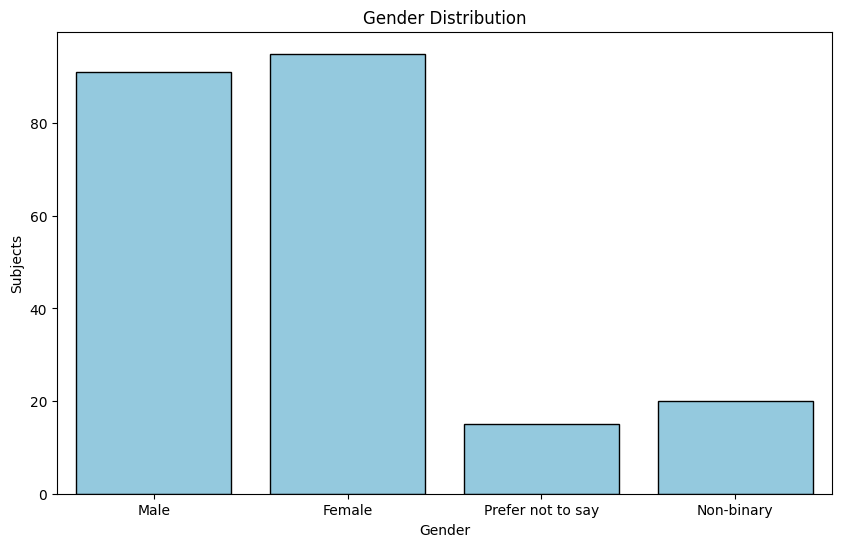

In [43]:
#[0] Male [1] Female [2] Non-binary [3] Prefer not to say

# Replace numeric codes with labels
gender_labels = {
    0: 'Male',
    1: 'Female',
    2: 'Non-binary',
    3: 'Prefer not to say'
}
df['gender_label'] = df['gender'].map(gender_labels)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender_label', color='skyblue',edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Subjects')
plt.title('Gender Distribution')
#plt.xticks(rotation=15)
#plt.grid(True)
plt.show()


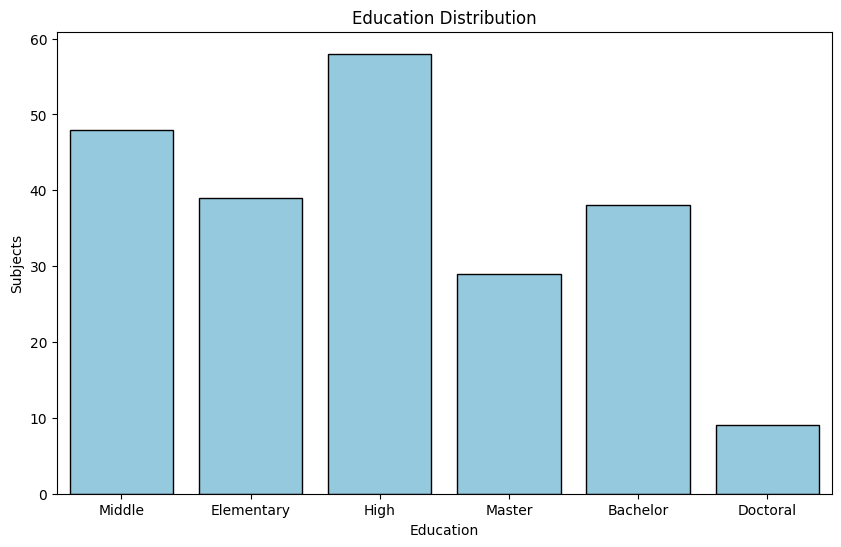

In [39]:
#[5] Elementary school [8] Middle school [13] High School [18]Bachelor's Degree [22] Master's Degree [25] Doctoral Degree

# Replace numeric codes with labels
school_labels = {
    5: 'Elementary',
    8: 'Middle',
    13: 'High',
    18: 'Bachelor',
    22: 'Master',
    25: 'Doctoral'
}
df['school_labels'] = df['education'].map(school_labels)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='school_labels', color='skyblue',edgecolor='black')
plt.xlabel('Education')
plt.ylabel('Subjects')
plt.title('Education Distribution')
#plt.xticks(rotation=15)
#plt.grid(True)
plt.show()

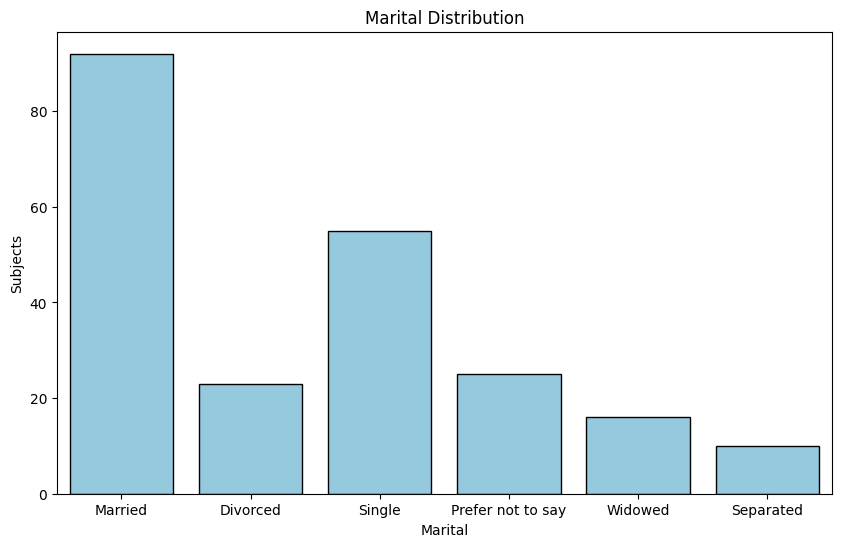

In [38]:
#[5] [0] Single [1] Married [2] Divorced [3] Widowed [4] Separated [5] Prefer not to say

# Replace numeric codes with labels
marital_labels = {
    0: 'Single',
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Prefer not to say'
}
df['marital_labels'] = df['marital'].map(marital_labels)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital_labels', color='skyblue',edgecolor='black')
plt.xlabel('Marital')
plt.ylabel('Subjects')
plt.title('Marital Distribution')
#plt.xticks(rotation=15)
plt.show()



In order to focus on internet addiction, let's drop out all the indices related to other addictions:
- dropped columns --> AUDIT (Alcohol Use Disorders Identification Test), DAST (Drug Abuse Screening Test), PGSI (Problem Gambling Severity Index), 
- maintained cols --> PCL-5 (PTSD Checklist for DSM-5), MSPSS (Multidimensional Scale of Perceived Social Support), SWLS (Satisfaction With Life Scale), WHO-5 (Well-Being Index)

In [40]:
# Identify columns related to AUDIT, DAST, and PGSI
cols_to_remove = [col for col in df.columns if col.lower().startswith(('audit','dast','pgsi','gender_label','school_label','marital_labels'))]

# Drop those columns
df_filtered = df.drop(columns=cols_to_remove)

# Save cleaned dataset
# df_filtered.to_csv('dataset_eHealth20252026_noAUDIT_DAST_PGSI.csv', index=False)

To verify, let's show both datasets.

In [41]:
df

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2.0,0,2.0,3,3.0,3.0,2.0,Male,Middle,Married
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,4.0,4,0.0,0,3.0,2.0,2.0,Female,Elementary,Married
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0.0,2,3.0,2,3.0,2.0,3.0,Male,High,Divorced
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,3.0,4,3.0,2,1.0,2.0,3.0,Female,Master,Single
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5.0,7,5.0,5,4.0,3.0,3.0,Female,Master,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,39.0,1,13.0,5.0,45000,2,1,2.0,2,2.0,...,6.0,7,4.0,5,5.0,3.0,5.0,Female,High,Prefer not to say
217,20.0,1,5.0,1.0,21000,3,1,3.0,3,1.0,...,1.0,0,1.0,2,3.0,2.0,3.0,Female,Elementary,Married
218,21.0,1,8.0,5.0,24000,1,0,1.0,1,1.0,...,6.0,1,3.0,4,0.0,5.0,5.0,Female,Middle,Prefer not to say
219,40.0,0,5.0,0.0,22000,3,4,4.0,0,2.0,...,4.0,4,0.0,3,1.0,0.0,2.0,Male,Elementary,Single


In [42]:
df_filtered

,age,gender,education,marital,income,iat_1,iat_2,iat_3,iat_4,iat_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,2.0,3,3.000000,3,2.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,3.0,3,3.000000,1,3.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,4.0,1,4.000000,3,4.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,4.0,4,0.000000,0,3.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,0.0,0,0.000000,0,0.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,39.0,1,13.0,5.0,45000,0.0,0,0.000000,0,2.0,...,5,7.0,6.0,6.0,7,4.0,5,5.0,3.0,5.0
217,20.0,1,5.0,1.0,21000,3.0,0,2.000000,3,3.0,...,4,2.0,4.0,1.0,0,1.0,2,3.0,2.0,3.0
218,21.0,1,8.0,5.0,24000,5.0,5,5.000000,5,5.0,...,5,6.0,6.0,6.0,1,3.0,4,0.0,5.0,5.0
219,40.0,0,5.0,0.0,22000,2.0,3,2.555046,3,2.0,...,4,2.0,4.0,4.0,4,0.0,3,1.0,0.0,2.0


## Shapiro-Wilk test
Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed.

It’s a widely-used statistical tool that can help us find an answer to the normality check we need, but it has one flaw: It doesn’t work well with large data sets. The maximum allowed size for a data set depends on the implementation. For example, for samples larger than 5,000, the Shapiro-Wilk test with SciPy in Python still runs, but it issues a warning that the p-value may not be accurate due to limitations in the test’s underlying assumptions.

https://builtin.com/data-science/shapiro-wilk-test

Shapiro–Wilk statistic = 0.8886, p-value = 0.000000
The overall IAT values are NOT normally distributed.


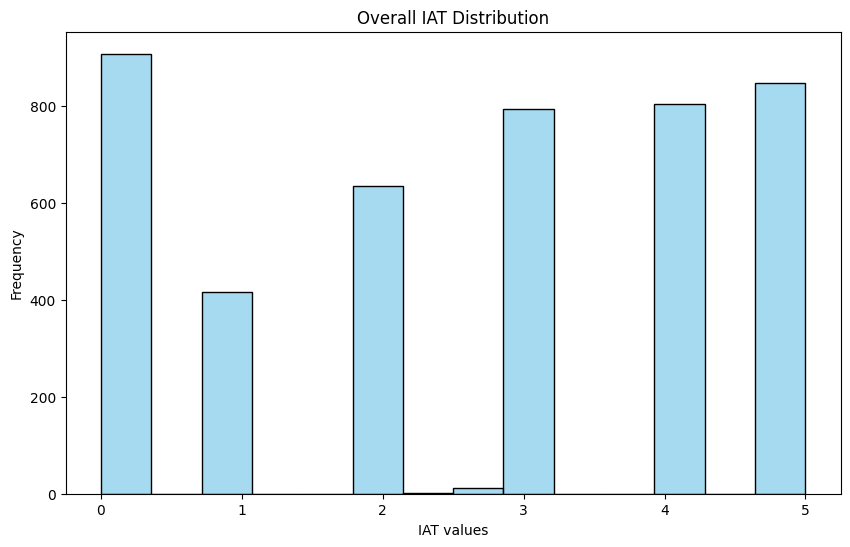

In [56]:
iat_cols = [col for col in df_filtered.columns if col.startswith('iat_')]

# all values are unified
all_iat_values = df_filtered[iat_cols].values.flatten()

# Shapiro-Wilk test
stat, p = shapiro(all_iat_values)

alpha = 0.05
print(f"Shapiro–Wilk statistic = {stat:.4f}, p-value = {p:.6f}")
if p > alpha:
    print("The overall IAT values are normally distributed.")
else:
    print("The overall IAT values are NOT normally distributed.")

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(all_iat_values, color='skyblue', edgecolor='black')
plt.title('Overall IAT Distribution')
plt.xlabel('IAT values')
plt.ylabel('Frequency')
plt.show()


The resulting p-value (p < 0.001) indicated a significant deviation from normality, suggesting that the overall distribution of IAT scores cannot be assumed to be Gaussian (so parametric tests that assume normality, like t-tests or ANOVA, might not be appropriate without transformations).

## da eliminare

In [23]:
results = []
for i in range(1, 21):
    col = f'iat_{i}'
    data = df[col].dropna()
    stat, p = shapiro(data)
    results.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results)
result_df.to_csv('iat1to10_shapiro_results.csv', index=False)
result_df.head(10)

,column,statistic,p_value,alpha,normal
0,iat_1,0.903475,9.494597e-11,0.05,False
1,iat_2,0.901182,6.655353e-11,0.05,False
2,iat_3,0.895593,2.861279e-11,0.05,False
3,iat_4,0.883088,4.799112e-12,0.05,False
4,iat_5,0.902665,8.369329e-11,0.05,False
5,iat_6,0.895342,2.756858e-11,0.05,False
6,iat_7,0.882381,4.355180e-12,0.05,False
7,iat_8,0.893403,2.072251e-11,0.05,False
8,iat_9,0.877132,2.144801e-12,0.05,False
9,iat_10,0.864907,4.446108e-13,0.05,False


In [22]:
# generate gaussian data
random.seed(42)

# generate univariate observations
data =  stats.norm(scale=1, loc=0).rvs(1000)

# summarize
print('mean=%.3f stdv=%.3f' % (np.mean(data), np.std(data)))

mean=-0.038 stdv=1.008


## da mantenere

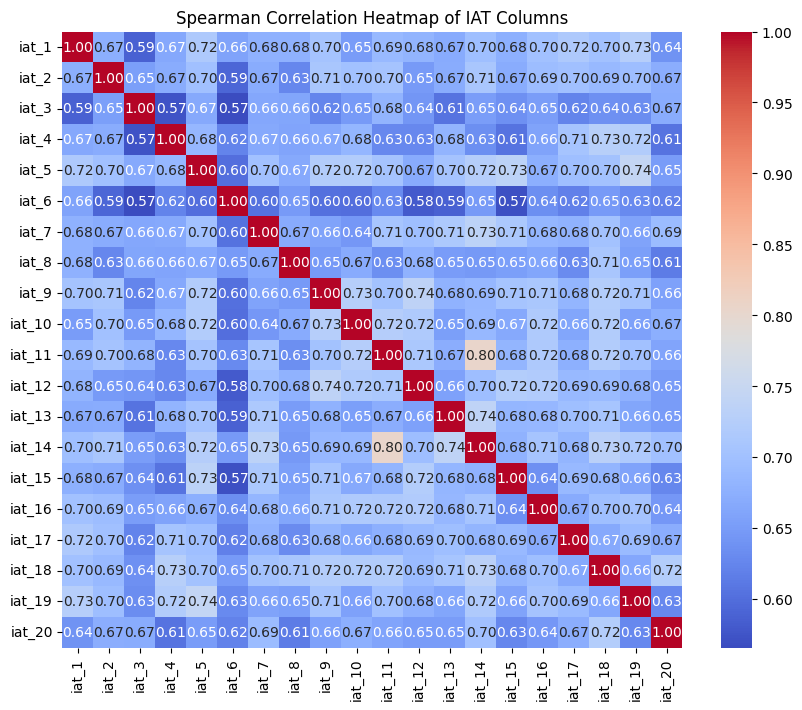

In [57]:
# Select only IAT columns
df_iat = df_filtered[iat_cols]

# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix = df_iat.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of IAT Columns")
plt.show()

## Cronbach's Alpha 
Internal consistency and sum scores: Internal consistency indicates that the individual items (or components) of a test or dataset are reliably measuring the same thing. 
For this reason, it is possible to compute the sum and the mean as representative values of all the consistent items which are present in the dataset.

In [58]:
#https://how.dev/answers/how-to-implement-cronbachs-alpha-for-reliability-in-python
def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every
    # relevant correlation to an array called 'r_s'. Then, we'll
    # calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [59]:
# Calling function to the calculate value of Cronbach's alpha
cronbach_alpha(df_iat)

0.9733796782388068

Since the value is near to 1, there is internal consistency, so below there is the computation of the mean and the sum as representative values for IAT.

In [60]:
#specify the columns to sum
cols_to_sum = [col for col in df_filtered.columns if col.lower().startswith(('iat'))]

#define new column that contains sum of specific columns
df_filtered['sum_iat'] = df_filtered[cols_to_sum].sum(axis=1)
df_filtered['mean_iat'] = df_filtered[cols_to_sum].mean(axis=1)

#view updated DataFrame
df_filtered

,age,gender,education,marital,income,iat_1,iat_2,iat_3,iat_4,iat_5,...,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5,sum_iat,mean_iat
0,39.0,0,8.0,1.0,14000,2.0,3,3.000000,3,2.0,...,4.0,2.0,0,2.0,3,3.0,3.0,2.0,39.000000,1.950000
1,18.0,1,5.0,1.0,25000,3.0,3,3.000000,1,3.0,...,2.0,4.0,4,0.0,0,3.0,2.0,2.0,33.000000,1.650000
2,40.0,0,13.0,2.0,56000,4.0,1,4.000000,3,4.0,...,4.0,0.0,2,3.0,2,3.0,2.0,3.0,60.000000,3.000000
3,24.0,1,22.0,0.0,35000,4.0,4,0.000000,0,3.0,...,4.0,3.0,4,3.0,2,1.0,2.0,3.0,56.000000,2.800000
4,19.0,1,22.0,1.0,42000,0.0,0,0.000000,0,0.0,...,3.0,5.0,7,5.0,5,4.0,3.0,3.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,39.0,1,13.0,5.0,45000,0.0,0,0.000000,0,2.0,...,6.0,6.0,7,4.0,5,5.0,3.0,5.0,6.000000,0.300000
217,20.0,1,5.0,1.0,21000,3.0,0,2.000000,3,3.0,...,4.0,1.0,0,1.0,2,3.0,2.0,3.0,40.000000,2.000000
218,21.0,1,8.0,5.0,24000,5.0,5,5.000000,5,5.0,...,6.0,6.0,1,3.0,4,0.0,5.0,5.0,100.000000,5.000000
219,40.0,0,5.0,0.0,22000,2.0,3,2.555046,3,2.0,...,4.0,4.0,4,0.0,3,1.0,0.0,2.0,31.555046,1.577752


According to the literature review related to the Internet Addiction Test, total scores that range:
- from 0 to 30 points reflect a normal level of Internet usage; 
- from 31 to 49 points indicate the presence of a mild level of Internet addiction; 
- from 50 to 79 points reflect the presence of a moderate level;
- from 80 to 100 points indicate a severe dependence upon the Internet.

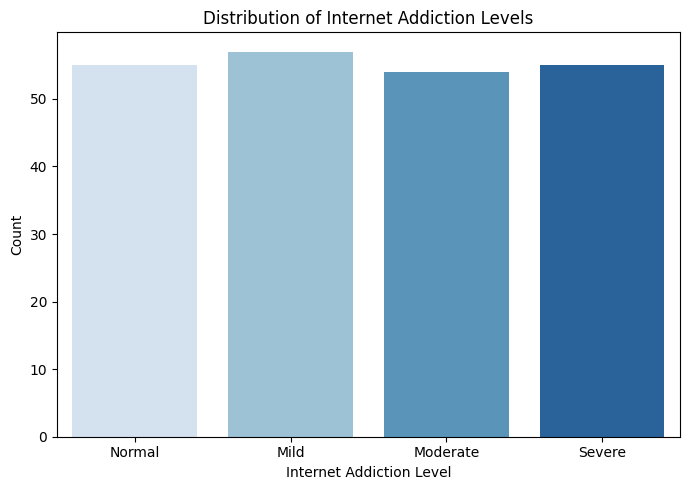

(None,
 addiction_level
 Mild        57
 Normal      55
 Severe      55
 Moderate    54
 Name: count, dtype: int64)

In [62]:
# Define addiction levels based on sum_iat cut-offs
def classify_iat(total):
    if total <= 30:
        return 'Normal'
    elif total <= 49:
        return 'Mild'
    elif total <= 79:
        return 'Moderate'
    else:
        return 'Severe'

# Apply classification
df_filtered['addiction_level'] = df_filtered['sum_iat'].apply(classify_iat)

# Group and count occurrences
# Prepare data as DataFrame with explicit columns
order = ['Normal', 'Mild', 'Moderate', 'Severe']
grouped = df_filtered['addiction_level'].value_counts().reindex(order).reset_index() 
# reindex Ensures the Series is re-ordered to match your custom order list (['Normal', 'Mild', 'Moderate', 'Severe']). 

grouped.columns = ['addiction_level', 'count']

# Create the blue gradient palette and create the barplot
blue_palette = sns.color_palette("Blues", n_colors=4)

plt.figure(figsize=(7,5))
sns.barplot(
    data=grouped,
    x='addiction_level',
    y='count',
    hue='addiction_level',
    palette=blue_palette,
    dodge=False,       # Avoids stacked bars
    order=order,
    legend=False
)
plt.xlabel('Internet Addiction Level')
plt.ylabel('Count')
plt.title('Distribution of Internet Addiction Levels')
plt.tight_layout()

plt.show(), df_filtered['addiction_level'].value_counts()

## Correlation between IAT and other indices

In [27]:
# Select specific columns
pcl5_cols = [col for col in df.columns if col.startswith('pcl5_')]
df_pcl5 = df[pcl5_cols]

mspss_cols = [col for col in df.columns if col.startswith('mspss_')]
df_mspss = df[mspss_cols]

swls_cols = [col for col in df.columns if col.startswith('swls_')]
df_swls = df[swls_cols]

who5_cols = [col for col in df.columns if col.startswith('who5_')]
df_who5 = df[who5_cols]

cronbach_alpha(df_pcl5), cronbach_alpha(df_mspss), cronbach_alpha(df_swls), cronbach_alpha(df_who5)

(np.float64(0.981662660998379),
 np.float64(0.8770097490178017),
 np.float64(0.7748408754719167),
 np.float64(0.6120714838760652))

These results indicate strong internal consistency for the pcl5, mspss, and swls scales, and moderate consistency for who5. You can sum or average the items in each subscale as reference values for further analysis.

In [28]:
results_pcl5 = []
for i in range(1, 21):
    col = f'pcl5_{i}'
    data = df[col].dropna()
    stat, p = shapiro(data)
    results_pcl5.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_pcl5)
result_df.to_csv('pcl51to20_shapiro_results.csv', index=False)
result_df.head(10)

,column,statistic,p_value,alpha,normal
0,pcl5_1,0.671860,1.808626e-20,0.05,False
1,pcl5_2,0.641007,2.560438e-21,0.05,False
2,pcl5_3,0.636243,1.915165e-21,0.05,False
3,pcl5_4,0.671658,1.784849e-20,0.05,False
4,pcl5_5,0.666840,1.303775e-20,0.05,False
5,pcl5_6,0.650705,4.666920e-21,0.05,False
6,pcl5_7,0.677305,2.590613e-20,0.05,False
7,pcl5_8,0.660249,8.531291e-21,0.05,False
8,pcl5_9,0.667447,1.356204e-20,0.05,False
9,pcl5_10,0.642938,2.882789e-21,0.05,False


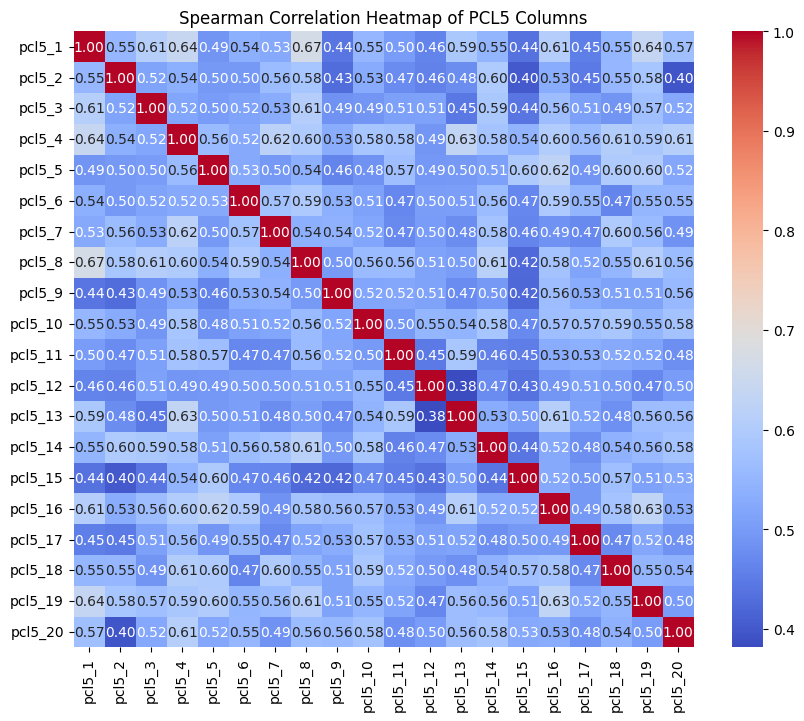

In [29]:
# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_pcl5 = df_pcl5.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pcl5, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of PCL5 Columns")
plt.show()

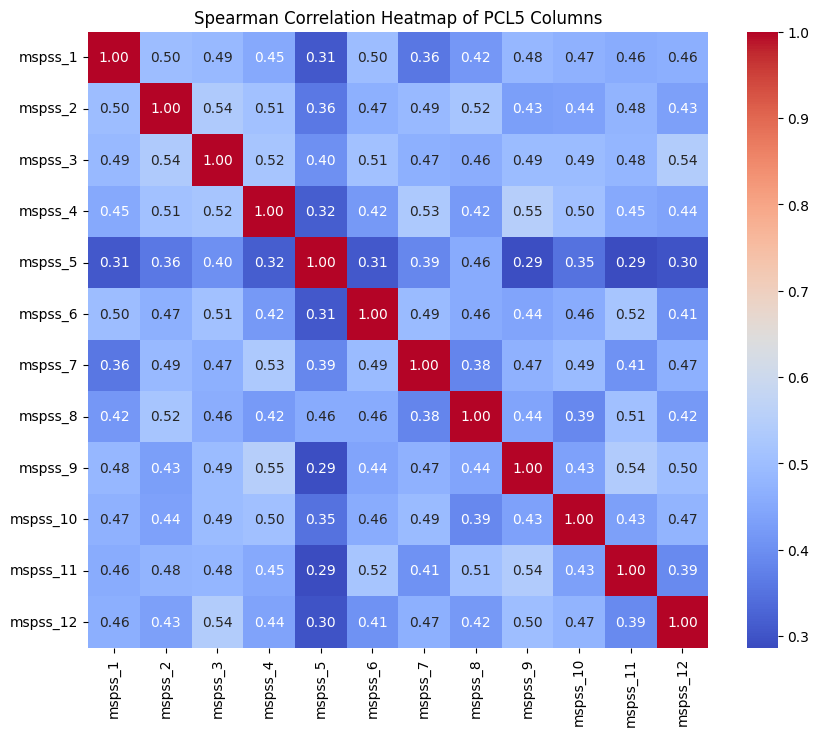

In [30]:
# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_mspss = df_mspss.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_mspss, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of PCL5 Columns")
plt.show()

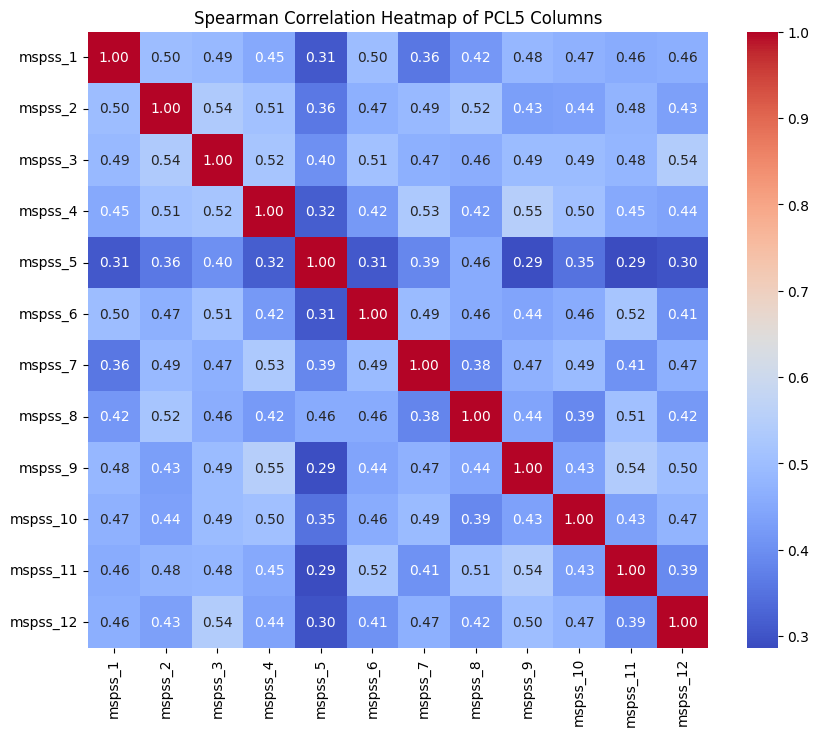

In [31]:
# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_mspss = df_mspss.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_mspss, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of PCL5 Columns")
plt.show()

In [32]:
df_mspss = df[mspss_cols]

df_swls = df[swls_cols]

df_who5 = df[who5_cols]

In [33]:
# Specifica le colonne da sommare (tutte quelle che iniziano con "swls")
cols_to_sum = [col for col in df_filtered.columns if col.lower().startswith('swls')]

# Crea nuove colonne con somma e media delle colonne SWLS
df_filtered['sum_swls'] = df_filtered[cols_to_sum].sum(axis=1)
df_filtered['mean_swls'] = df_filtered[cols_to_sum].mean(axis=1)

# Visualizza le prime righe per verificare
print(df_filtered[['sum_swls', 'mean_swls']].head())

df_filtered 


   sum_swls  mean_swls
0       8.0        1.6
1      14.0        2.8
2       8.0        1.6
3      15.0        3.0
4      27.0        5.4


,age,gender,education,marital,income,iat_1,iat_2,iat_3,iat_4,iat_5,...,who5_1,who5_2,who5_3,who5_4,who5_5,sum_iat,mean_iat,addiction_level,sum_swls,mean_swls
0,39.0,0,8.0,1.0,14000,2.0,3,3.000000,3,2.0,...,2.0,3,3.0,3.0,2.0,39.000000,1.950000,Mild,8.0,1.6
1,18.0,1,5.0,1.0,25000,3.0,3,3.000000,1,3.0,...,0.0,0,3.0,2.0,2.0,33.000000,1.650000,Mild,14.0,2.8
2,40.0,0,13.0,2.0,56000,4.0,1,4.000000,3,4.0,...,3.0,2,3.0,2.0,3.0,60.000000,3.000000,Moderate,8.0,1.6
3,24.0,1,22.0,0.0,35000,4.0,4,0.000000,0,3.0,...,3.0,2,1.0,2.0,3.0,56.000000,2.800000,Moderate,15.0,3.0
4,19.0,1,22.0,1.0,42000,0.0,0,0.000000,0,0.0,...,5.0,5,4.0,3.0,3.0,0.000000,0.000000,Normal,27.0,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,39.0,1,13.0,5.0,45000,0.0,0,0.000000,0,2.0,...,4.0,5,5.0,3.0,5.0,6.000000,0.300000,Normal,31.0,6.2
217,20.0,1,5.0,1.0,21000,3.0,0,2.000000,3,3.0,...,1.0,2,3.0,2.0,3.0,40.000000,2.000000,Mild,11.0,2.2
218,21.0,1,8.0,5.0,24000,5.0,5,5.000000,5,5.0,...,3.0,4,0.0,5.0,5.0,100.000000,5.000000,Severe,24.0,4.8
219,40.0,0,5.0,0.0,22000,2.0,3,2.555046,3,2.0,...,0.0,3,1.0,0.0,2.0,31.555046,1.577752,Mild,18.0,3.6


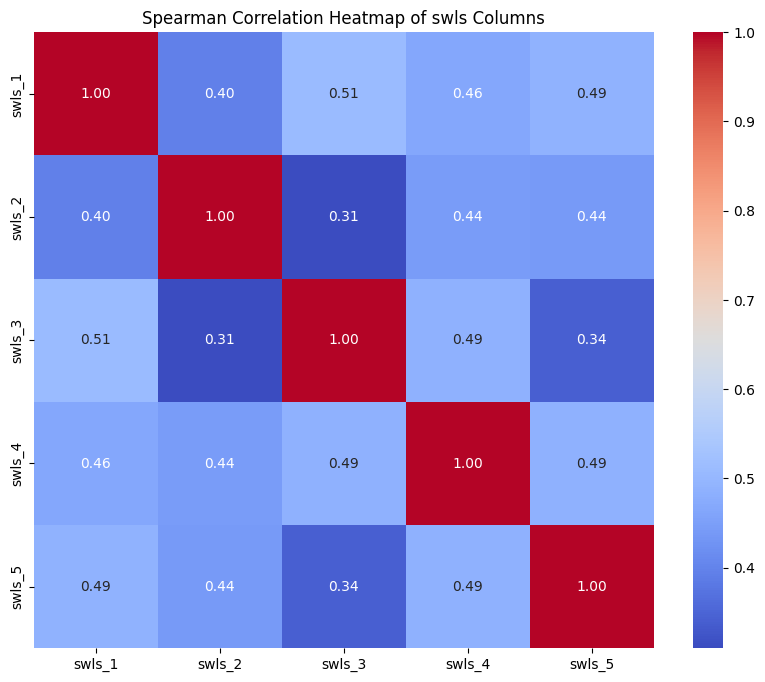

In [34]:
# Select only swls columns
iat_cols = [col for col in df.columns if col.startswith('swls')]
df_iat = df[iat_cols]

# Calculate the correlation matrix (default is Pearson, for non-parametric use df_swls.corr(method='spearman'))
corr_matrix = df_iat.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of swls Columns")
plt.show()

Siccome non ci sono valori superiori a 0,7 i dati non sono correlati e quindi non posso calcolarne la somma e la media

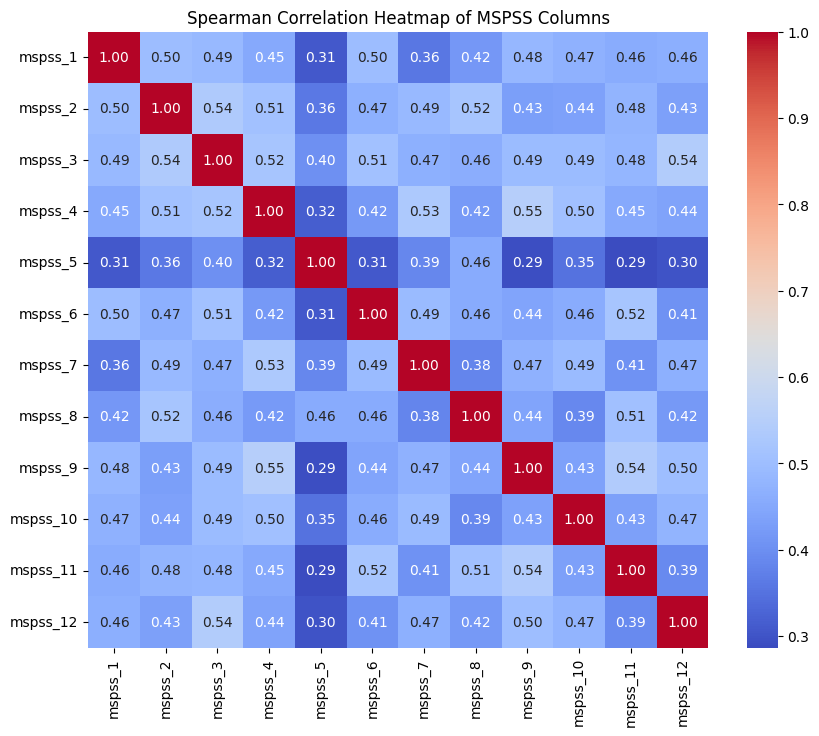

In [35]:
df_mspss = df[mspss_cols]
# Select only MSPSS columns, Multidimensional Scale of Perceived Social Support
mspss_cols = [col for col in df.columns if col.startswith('mspss_')]
df_mspss = df[mspss_cols]

# Calculate the correlation matrix
corr_matrix = df_mspss.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of MSPSS Columns")
plt.show()



Analisi sottogruppo: Significant Other
Colonne: ['mspss_1', 'mspss_2', 'mspss_5', 'mspss_10']

Matrice di correlazione Spearman:
          mspss_1  mspss_2  mspss_5  mspss_10
mspss_1      1.00     0.50     0.31      0.47
mspss_2      0.50     1.00     0.36      0.44
mspss_5      0.31     0.36     1.00      0.35
mspss_10     0.47     0.44     0.35      1.00


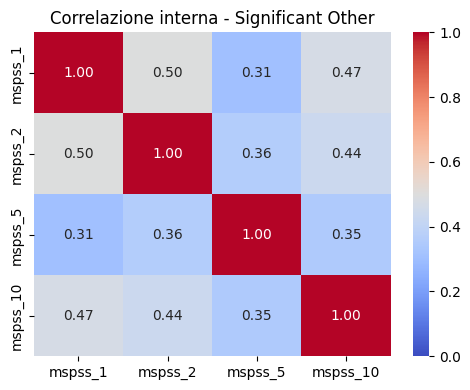

Correlazione media tra item (Significant Other): 0.40
✅ Correlazione sufficiente: calcolata la media dei valori (Significant Other).

Analisi sottogruppo: Family
Colonne: ['mspss_3', 'mspss_4', 'mspss_8', 'mspss_11']

Matrice di correlazione Spearman:
          mspss_3  mspss_4  mspss_8  mspss_11
mspss_3      1.00     0.52     0.46      0.48
mspss_4      0.52     1.00     0.42      0.45
mspss_8      0.46     0.42     1.00      0.51
mspss_11     0.48     0.45     0.51      1.00


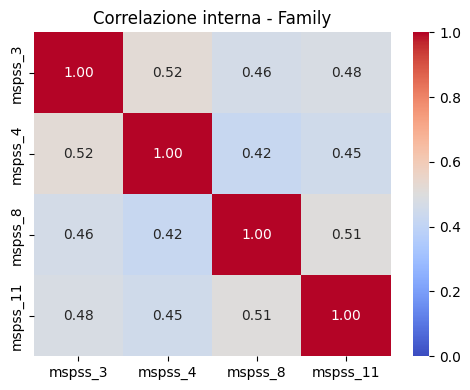

Correlazione media tra item (Family): 0.47
✅ Correlazione sufficiente: calcolata la media dei valori (Family).

Analisi sottogruppo: Friends
Colonne: ['mspss_6', 'mspss_7', 'mspss_9', 'mspss_12']

Matrice di correlazione Spearman:
          mspss_6  mspss_7  mspss_9  mspss_12
mspss_6      1.00     0.49     0.44      0.41
mspss_7      0.49     1.00     0.47      0.47
mspss_9      0.44     0.47     1.00      0.50
mspss_12     0.41     0.47     0.50      1.00


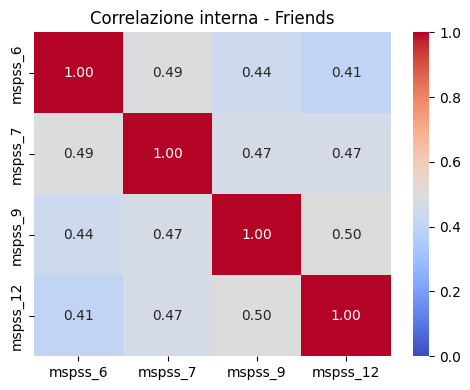

Correlazione media tra item (Friends): 0.46
✅ Correlazione sufficiente: calcolata la media dei valori (Friends).


In [36]:
# ============================================================
# Analisi interna per sottogruppi MSPSS
# Calcolo della matrice di correlazione di ciascun gruppo
# e della media solo se gli item risultano correlati
# ============================================================
# ------------------------------------------------------------
# In this section, we investigate the internal consistency of the MSPSS subscales
# (Significant Other, Family, and Friends).
# For each subgroup of items, we calculate a Spearman correlation matrix
# to check whether the questions within that group are sufficiently correlated.
# If the average correlation between the items exceeds a threshold (ρ > 0.3),
# we compute the mean score as a representative value for that subscale.
#
# In our analysis, the internal correlations were low, which means
# that the items within each subgroup did not show strong relationships.
# However, testing this was still useful to verify the structure of the scale.

# --- Definizione dei sottogruppi (adatta se necessario) ---
so_items = [c for c in [f"mspss_{i}" for i in [1, 2, 5, 10]] if c in df.columns]  # Significant Other
fa_items = [c for c in [f"mspss_{i}" for i in [3, 4, 8, 11]] if c in df.columns]  # Family
fr_items = [c for c in [f"mspss_{i}" for i in [6, 7, 9, 12]] if c in df.columns]  # Friends


# --- Funzione per analizzare un sottogruppo ---
def analyze_subgroup(name, cols):
    if not cols:
        print(f"\n⚠️ Nessuna colonna trovata per {name}.")
        return None

    print(f"\n==============================")
    print(f"Analisi sottogruppo: {name}")
    print(f"Colonne: {cols}")

    # Calcolo matrice di correlazione Spearman
    corr = df[cols].corr(method='spearman')
    print("\nMatrice di correlazione Spearman:")
    print(corr.round(2))

    # Visualizza heatmap per chiarezza
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=0, vmax=1)
    plt.title(f"Correlazione interna - {name}")
    plt.tight_layout()
    plt.show()

    # Calcola correlazione media (esclude diagonale)
    mean_corr = corr.where(~np.eye(len(corr), dtype=bool)).stack().mean()
    print(f"Correlazione media tra item ({name}): {mean_corr:.2f}")

    # Se media di correlazione sopra soglia, calcola media dei punteggi
    if mean_corr > 0.3:
        mean_score = df[cols].mean(axis=1)
        print(f"✅ Correlazione sufficiente: calcolata la media dei valori ({name}).")
        return mean_score
    else:
        print(f"❌ Correlazione bassa: non viene calcolata la media ({name}).")
        return None


# --- Analisi dei tre sottogruppi ---
so_mean = analyze_subgroup("Significant Other", so_items)
fa_mean = analyze_subgroup("Family", fa_items)
fr_mean = analyze_subgroup("Friends", fr_items)


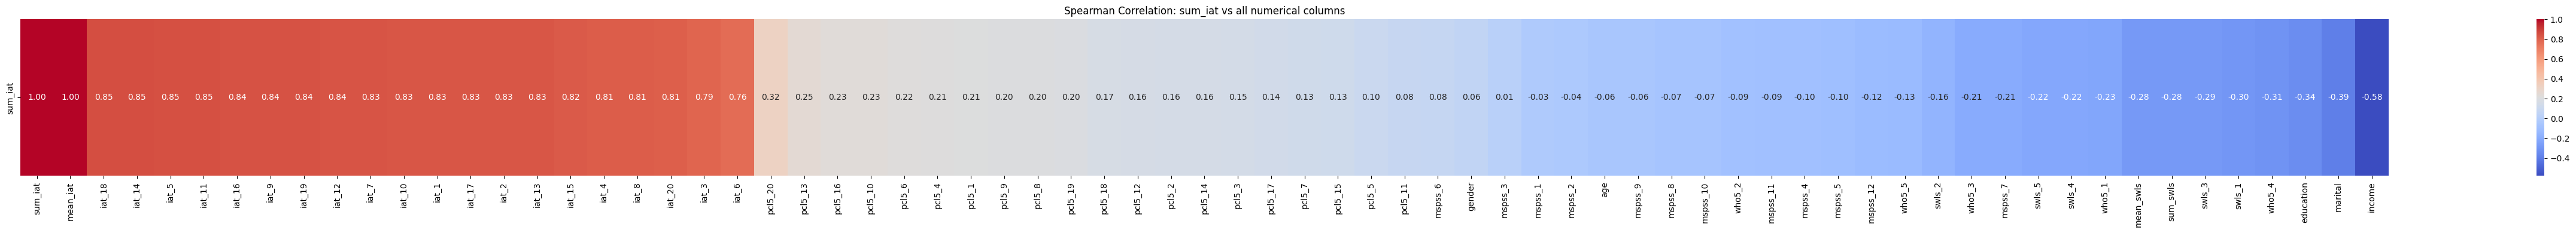

=== Correlazioni forti con sum_iat (|r| >= 0.5) ===
mean_iat             → r = 1.00
iat_18               → r = 0.85
iat_14               → r = 0.85
iat_5                → r = 0.85
iat_11               → r = 0.85
iat_16               → r = 0.84
iat_9                → r = 0.84
iat_19               → r = 0.84
iat_12               → r = 0.84
iat_7                → r = 0.83
iat_10               → r = 0.83
iat_1                → r = 0.83
iat_17               → r = 0.83
iat_2                → r = 0.83
iat_13               → r = 0.83
iat_15               → r = 0.82
iat_4                → r = 0.81
iat_8                → r = 0.81
iat_20               → r = 0.81
iat_3                → r = 0.79
iat_6                → r = 0.76
income               → r = -0.58

=== Top 10 correlazioni (per valore assoluto) ===
sum_iat     1.000000
mean_iat    1.000000
iat_18      0.854708
iat_14      0.852420
iat_5       0.850908
iat_11      0.847385
iat_16      0.841494
iat_9       0.840314
iat_19      0.840222
iat

In [37]:
# ===========================================================
# Correlazione tra IAT totale (sum_iat) e tutte le altre colonne
# - Calcola la correlazione Spearman (non assume normalità)
# - Mostra heatmap delle correlazioni con sum_iat
# - Stampa le correlazioni forti (|r| >= 0.5)
# ===========================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona solo colonne numeriche (esclude label testuali)
num_cols = df_filtered.select_dtypes(include=['number']).columns

# Calcola la correlazione con sum_iat
corr_with_iat = df_filtered[num_cols].corr(method='spearman')['sum_iat'].sort_values(ascending=False)

# Crea un DataFrame per la heatmap
corr_df = corr_with_iat.to_frame().T  # una riga: sum_iat vs tutte le altre
corr_df.index = ['sum_iat']

# --- Plot Heatmap ---
plt.figure(figsize=(50, 4))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Spearman Correlation: sum_iat vs all numerical columns")
plt.tight_layout()
plt.show()

# --- Stampa correlazioni forti ---
threshold = 0.5  # puoi variare la soglia
print("=== Correlazioni forti con sum_iat (|r| >= 0.5) ===")
strong_corrs = corr_with_iat[abs(corr_with_iat) >= threshold]

if not strong_corrs.empty:
    for col, r in strong_corrs.items():
        if col != 'sum_iat':
            print(f"{col:20s} → r = {r:.2f}")
else:
    print("Nessuna correlazione forte trovata (|r| < 0.5).")

# --- (opzionale) Mostra top 10 in ordine assoluto ---
print("\n=== Top 10 correlazioni (per valore assoluto) ===")
print(corr_with_iat.reindex(corr_with_iat.abs().sort_values(ascending=False).index)[:10])


In [38]:

# Mantieni solo soggetti con IAT > 30 (quindi Mild, Moderate, Severe)
df_iat_dep = df_filtered[df_filtered['sum_iat'] > 30]


# Controllo del risultato
print("Righe totali prima:", len(df_filtered))
print("Righe dopo rimozione 'Normal':", len(df_iat_dep))

# Distribuzione aggiornata dei livelli di dipendenza
print("\nDistribuzione residua dei livelli IAT:")
print(df_iat_dep['addiction_level'].value_counts())


Righe totali prima: 221
Righe dopo rimozione 'Normal': 166

Distribuzione residua dei livelli IAT:
addiction_level
Mild        57
Severe      55
Moderate    54
Name: count, dtype: int64


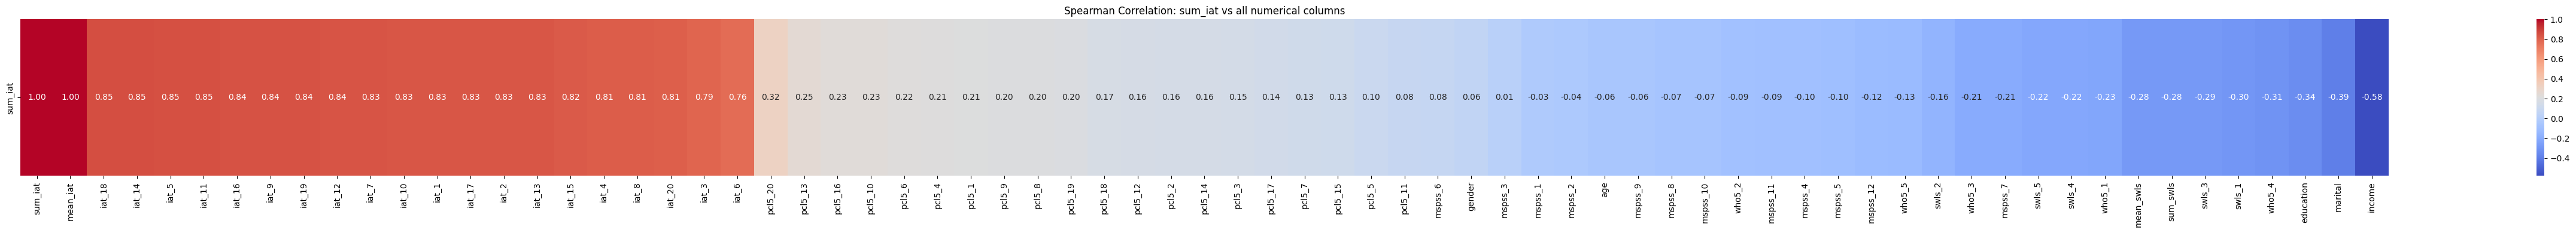

=== Correlazioni forti con sum_iat (|r| >= 0.5) ===
mean_iat             → r = 1.00
iat_18               → r = 0.85
iat_14               → r = 0.85
iat_5                → r = 0.85
iat_11               → r = 0.85
iat_16               → r = 0.84
iat_9                → r = 0.84
iat_19               → r = 0.84
iat_12               → r = 0.84
iat_7                → r = 0.83
iat_10               → r = 0.83
iat_1                → r = 0.83
iat_17               → r = 0.83
iat_2                → r = 0.83
iat_13               → r = 0.83
iat_15               → r = 0.82
iat_4                → r = 0.81
iat_8                → r = 0.81
iat_20               → r = 0.81
iat_3                → r = 0.79
iat_6                → r = 0.76
income               → r = -0.58

=== Top 10 correlazioni (per valore assoluto) ===
sum_iat     1.000000
mean_iat    1.000000
iat_18      0.854708
iat_14      0.852420
iat_5       0.850908
iat_11      0.847385
iat_16      0.841494
iat_9       0.840314
iat_19      0.840222
iat

In [39]:
# ===========================================================
# Correlazione tra IAT totale (sum_iat) e tutte le altre colonne
# - Calcola la correlazione Spearman (non assume normalità)
# - Mostra heatmap delle correlazioni con sum_iat
# - Stampa le correlazioni forti (|r| >= 0.5)
# ===========================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona solo colonne numeriche (esclude label testuali)
num_cols = df_filtered.select_dtypes(include=['number']).columns

# Calcola la correlazione con sum_iat
corr_with_iat = df_filtered[num_cols].corr(method='spearman')['sum_iat'].sort_values(ascending=False)

# Crea un DataFrame per la heatmap
corr_df = corr_with_iat.to_frame().T  # una riga: sum_iat vs tutte le altre
corr_df.index = ['sum_iat']

# --- Plot Heatmap ---
plt.figure(figsize=(50, 4))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Spearman Correlation: sum_iat vs all numerical columns")
plt.tight_layout()
plt.show()

# --- Stampa correlazioni forti ---
threshold = 0.5  # puoi variare la soglia
print("=== Correlazioni forti con sum_iat (|r| >= 0.5) ===")
strong_corrs = corr_with_iat[abs(corr_with_iat) >= threshold]

if not strong_corrs.empty:
    for col, r in strong_corrs.items():
        if col != 'sum_iat':
            print(f"{col:20s} → r = {r:.2f}")
else:
    print("Nessuna correlazione forte trovata (|r| < 0.5).")

# --- (opzionale) Mostra top 10 in ordine assoluto ---
print("\n=== Top 10 correlazioni (per valore assoluto) ===")
print(corr_with_iat.reindex(corr_with_iat.abs().sort_values(ascending=False).index)[:10])


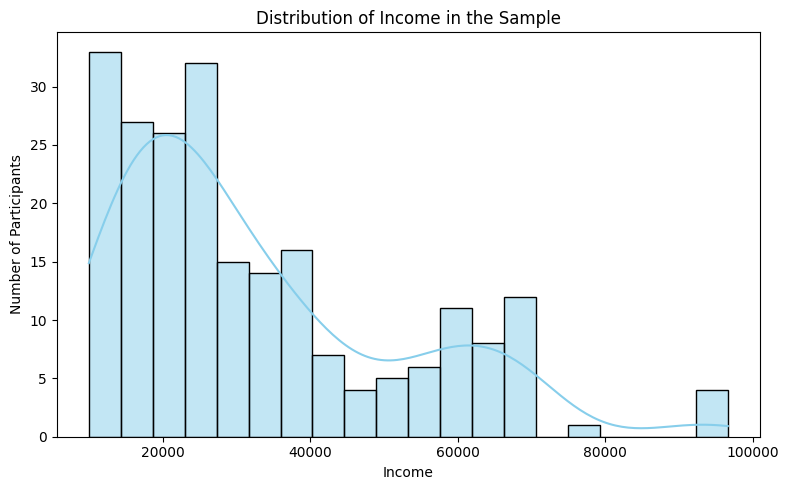

In [40]:
# ------------------------------------------------------------
# In this section, we analyzed how the total Internet Addiction
# score (sum_iat) correlates with the other variables in the dataset.
#
# The only variable showing a relevant correlation was 'income',
# with r = -0.58 (Spearman), indicating a moderate-to-strong
# inverse relationship: individuals with lower income tend to
# report higher levels of Internet addiction.
#
# This suggests that socio-economic factors might influence
# problematic Internet use — people with lower income could
# be more vulnerable due to limited access to alternative
# offline activities or greater reliance on digital spaces.
#
# Given this finding, our subsequent analyses will likely
# focus on participants belonging to lower income brackets.
# ------------------------------------------------------------


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_filtered,
    x='income',
    bins=20,
    kde=True,
    color='skyblue'
)
plt.title('Distribution of Income in the Sample')
plt.xlabel('Income')
plt.ylabel('Number of Participants')
plt.tight_layout()
plt.show()


income_group
Low       64.757106
Medium    64.510874
High      27.822427
Name: sum_iat, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_41696\813098646.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_iat_by_income = df_filtered.groupby('income_group')['sum_iat'].mean()


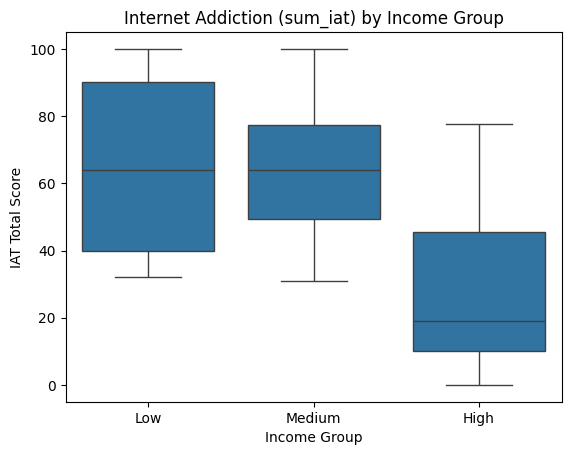

In [41]:
# Crea tre fasce di reddito (quantili)
df_filtered['income_group'] = pd.qcut(df_filtered['income'], q=3, labels=['Low', 'Medium', 'High'])

# Media di IAT per gruppo
mean_iat_by_income = df_filtered.groupby('income_group')['sum_iat'].mean()
print(mean_iat_by_income)

# Boxplot visuale
sns.boxplot(x='income_group', y='sum_iat', data=df_filtered, order=['Low', 'Medium', 'High'])
plt.title('Internet Addiction (sum_iat) by Income Group')
plt.xlabel('Income Group')
plt.ylabel('IAT Total Score')
plt.show()


Spearman correlation (log-income vs sum_iat): r = -0.580, p = 0.0000


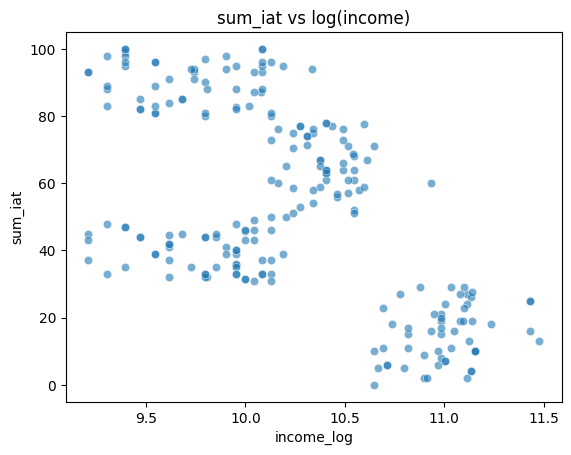

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Evita errori con log(0)
df_filtered['income_log'] = np.log1p(df_filtered['income'])  # log(1+x)

# Correlazione Spearman dopo log-transform
rho, pval = spearmanr(df_filtered['income_log'], df_filtered['sum_iat'], nan_policy='omit')
print(f"Spearman correlation (log-income vs sum_iat): r = {rho:.3f}, p = {pval:.4f}")

# Confronto grafico
sns.scatterplot(x='income_log', y='sum_iat', data=df_filtered, alpha=0.6)
plt.title('sum_iat vs log(income)')
plt.show()


In [43]:
from scipy.stats import kruskal

# Gruppi per income quantili
groups = [g['sum_iat'].dropna() for _, g in df_filtered.groupby('income_group')]

# Test di Kruskal–Wallis (equivalente non parametrico dell’ANOVA)
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis test: H = {stat:.3f}, p = {p:.4f}")

if p < 0.05:
    print("→ Le differenze di IAT tra i gruppi di reddito sono significative.")
else:
    print("→ Nessuna differenza statisticamente significativa tra i gruppi di reddito.")


Kruskal–Wallis test: H = 81.518, p = 0.0000
→ Le differenze di IAT tra i gruppi di reddito sono significative.


C:\Users\User\AppData\Local\Temp\ipykernel_41696\777661334.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g['sum_iat'].dropna() for _, g in df_filtered.groupby('income_group')]


Detected 72 numeric and 2 categorical variables.
FAMD will use 221 rows and 74 columns.

=== Top contributors to Dim1 ===
       variable              type      Dim1
addiction_level categorical(eta²)  0.962648
       sum_swls           numeric -0.760729
      mean_swls           numeric -0.760729
        mspss_2           numeric -0.692728
        mspss_3           numeric -0.689170
       mspss_11           numeric -0.671230
         swls_1           numeric -0.626318
        mspss_9           numeric -0.625503
        mspss_8           numeric -0.620668
        mspss_7           numeric -0.608226

=== Top contributors to Dim2 ===
       variable              type     Dim2
        sum_iat           numeric 0.977231
       mean_iat           numeric 0.977231
addiction_level categorical(eta²) 0.964218
          iat_9           numeric 0.857011
         iat_18           numeric 0.856957
         iat_11           numeric 0.838615
         iat_14           numeric 0.832404
          iat_5 

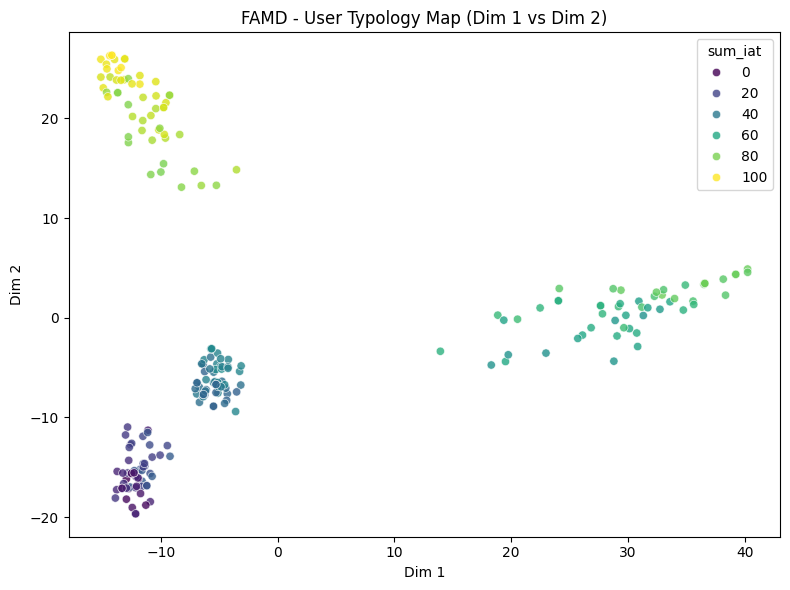

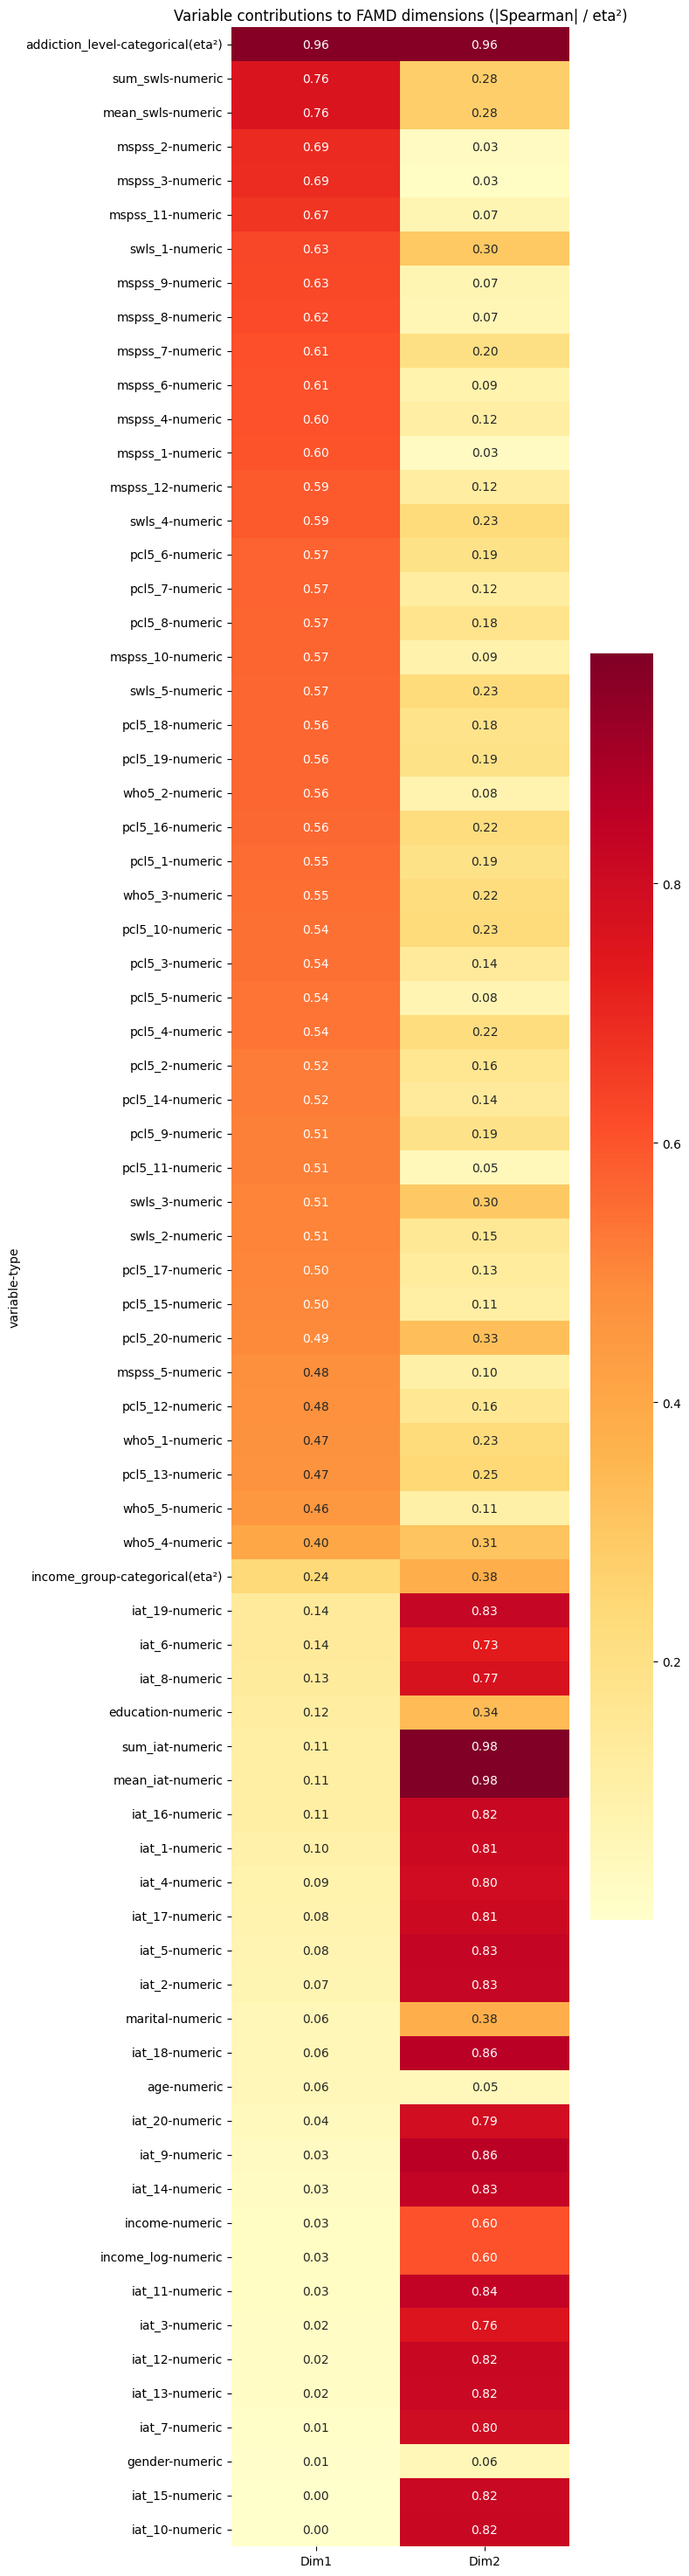

In [44]:
# ===========================================================
# FAMD (Factor Analysis of Mixed Data) - Automatic version
# - Uses all variables from df_filtered
# - Detects numeric vs categorical automatically
# - Computes variable contributions (|Spearman| for numeric, eta² for categorical)
# ===========================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prince
from scipy.stats import spearmanr

# --- 1️⃣ Detect variable types automatically ---
numeric_cols = df_filtered.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_filtered.select_dtypes(exclude=['number']).columns.tolist()

print(f"Detected {len(numeric_cols)} numeric and {len(categorical_cols)} categorical variables.")

# Combine all and drop rows with missing values in any of them
all_cols = numeric_cols + categorical_cols
df_famd = df_filtered[all_cols].dropna(how='any').reset_index(drop=True)

print(f"FAMD will use {len(df_famd)} rows and {len(all_cols)} columns.")

# --- 2️⃣ FAMD fit ---
famd = prince.FAMD(n_components=2, n_iter=10, random_state=42)
famd = famd.fit(df_famd)

scores = famd.row_coordinates(df_famd)
scores.columns = ['Dim1', 'Dim2']

# --- 3️⃣ Helper functions for contributions ---
def spearman_safe(x, y):
    x = pd.to_numeric(x, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')
    m = (~x.isna()) & (~y.isna())
    if m.sum() < 3:
        return np.nan
    r, _p = spearmanr(x[m], y[m])
    return r

def correlation_ratio(categories, values):
    s = pd.Series(values)
    c = pd.Series(categories).astype('category')
    mask = ~(s.isna() | c.isna())
    s, c = s[mask], c[mask]
    if s.empty:
        return np.nan
    groups = [s[c == lvl].values for lvl in c.cat.categories]
    n_total = sum(len(g) for g in groups)
    if n_total < 3 or any(len(g) == 0 for g in groups):
        return np.nan
    grand_mean = s.mean()
    ss_between = sum(len(g) * (g.mean() - grand_mean)**2 for g in groups)
    ss_total = sum((s - grand_mean)**2)
    return float(ss_between / ss_total) if ss_total > 0 else np.nan

# --- 4️⃣ Calculate contributions for each variable ---
rows = []

for v in numeric_cols:
    r1 = spearman_safe(df_famd[v], scores['Dim1'])
    r2 = spearman_safe(df_famd[v], scores['Dim2'])
    rows.append({'variable': v, 'type': 'numeric', 'Dim1': r1, 'Dim2': r2,
                 'Dim1_abs': abs(r1) if pd.notna(r1) else np.nan,
                 'Dim2_abs': abs(r2) if pd.notna(r2) else np.nan})

for v in categorical_cols:
    e1 = correlation_ratio(df_famd[v], scores['Dim1'])
    e2 = correlation_ratio(df_famd[v], scores['Dim2'])
    rows.append({'variable': v, 'type': 'categorical(eta²)', 'Dim1': e1, 'Dim2': e2,
                 'Dim1_abs': e1, 'Dim2_abs': e2})

contrib_tbl = pd.DataFrame(rows)

# --- 5️⃣ Display top contributors ---
print("\n=== Top contributors to Dim1 ===")
print(contrib_tbl.sort_values('Dim1_abs', ascending=False)[['variable','type','Dim1']].head(10).to_string(index=False))

print("\n=== Top contributors to Dim2 ===")
print(contrib_tbl.sort_values('Dim2_abs', ascending=False)[['variable','type','Dim2']].head(10).to_string(index=False))

# --- 6️⃣ Plot FAMD map (colored by addiction_level if present) ---
# --- 6️⃣ Plot FAMD map (colored by sum_iat) ---
plt.figure(figsize=(8,6))

# Controlla che sum_iat esista
if 'sum_iat' in df_famd.columns:
    hue_vec = df_famd['sum_iat']
    color_label = 'sum_iat (Internet Addiction Total Score)'
else:
    hue_vec = None
    color_label = None

sns.scatterplot(
    x=scores['Dim1'],
    y=scores['Dim2'],
    hue=hue_vec,
    palette='viridis',   # gradiente continuo, ottimo per valori numerici
    alpha=0.8
)
plt.title("FAMD - User Typology Map (Dim 1 vs Dim 2)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar = plt.colorbar  # mostra scala cromatica
plt.tight_layout()
plt.show()

# --- 7️⃣ Plot heatmap of contributions (uguale a prima) ---
heat = contrib_tbl.set_index(['variable','type'])[['Dim1_abs','Dim2_abs']] \
                  .rename(columns={'Dim1_abs':'Dim1','Dim2_abs':'Dim2'})
plt.figure(figsize=(8, max(4, 0.4*len(heat))))
sns.heatmap(heat.sort_values(['Dim1','Dim2'], ascending=False),
            annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Variable contributions to FAMD dimensions (|Spearman| / eta²)")
plt.tight_layout()
plt.show()


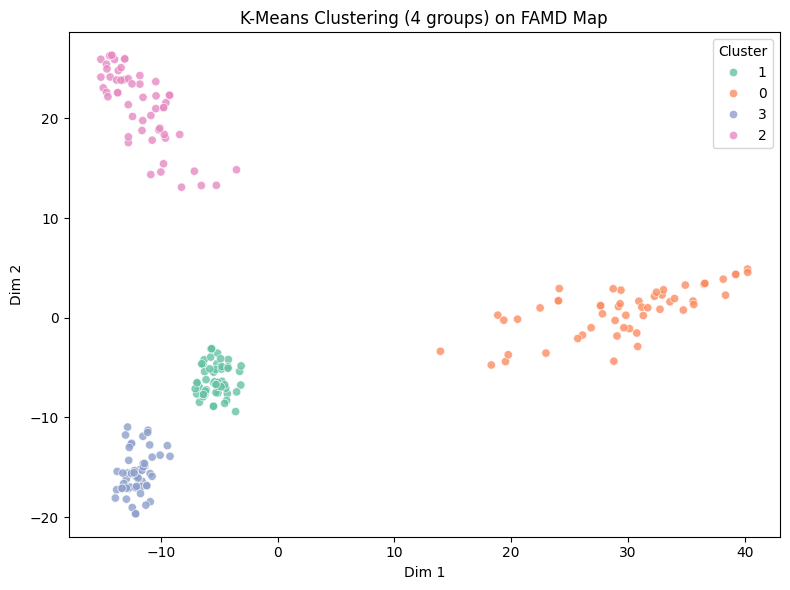


=== Cluster Summary (mean ± std) ===
        sum_iat                income                    age            
           mean   std count      mean       std count   mean   std count
cluster                                                                 
0         65.25  8.45    54  33285.19   5486.53    54  29.07  6.94    54
1         39.24  5.50    57  18589.47   4570.15    57  28.86  7.10    57
2         90.32  6.34    55  17665.44   5240.69    55  27.73  6.28    55
3         15.16  8.38    55  61159.98  12598.62    55  29.40  7.25    55

=== Addiction level distribution per cluster ===
addiction_level  Mild  Moderate  Normal  Severe
cluster                                        
0                   0        54       0       0
1                  57         0       0       0
2                   0         0       0      55
3                   0         0      55       0


In [45]:
# ===========================================================
# K-Means clustering on FAMD results
# ===========================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- 1️⃣ Estrarre le coordinate FAMD (Dim1 e Dim2) ---
X = scores[['Dim1', 'Dim2']]

# Normalizziamo le coordinate per evitare bias da scala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2️⃣ Eseguiamo il K-Means con 4 cluster ---
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_famd['cluster'] = kmeans.fit_predict(X_scaled)

# --- 3️⃣ Visualizzazione dei cluster sul piano fattoriale ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scores['Dim1'],
    y=scores['Dim2'],
    hue=df_famd['cluster'].astype(str),
    palette='Set2',
    alpha=0.8
)
plt.title("K-Means Clustering (4 groups) on FAMD Map")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# --- 4️⃣ Analisi descrittiva dei cluster ---
summary = df_famd.groupby('cluster')[['sum_iat', 'income', 'age']].agg(['mean', 'std', 'count']).round(2)
print("\n=== Cluster Summary (mean ± std) ===")
print(summary)

# --- 5️⃣ Distribuzione dei livelli di dipendenza nei cluster (se disponibile) ---
if 'addiction_level' in df_famd.columns:
    print("\n=== Addiction level distribution per cluster ===")
    print(df_famd.groupby(['cluster', 'addiction_level']).size().unstack(fill_value=0))


In [46]:
# ------------------------------------------------------------
# The clusters generated using the overall SAMIAT score should be kept as a first analytical step.
# They provide a useful macro-level segmentation of users (e.g., low, medium, and high problematic use)
# and represent a synthetic view of overall behavioral intensity.
# In the next step, the analysis of individual IAT items can be added to refine these clusters
# and characterize more specific user profiles within each group.

# TODO: ricordarsi di controllare come mai sono rimasti i vari iat dentro al dataset!
# In this section, we interpret the four user clusters obtained
# from the K-Means analysis performed on the FAMD results.
#
# Specifically:
# 1. We identify the 10 variables that most contributed to the
#    two main FAMD dimensions (based on their average loading).
# 2. For each cluster, we compute descriptive statistics:
#    - For numerical variables → mean and median values.
#    - For categorical variables → the most frequent category (mode).
#
# This allows us to summarize the defining characteristics of each
# user group (e.g., high Internet addiction, low income, specific
# education level, etc.) and better understand the behavioral and
# socio-demographic profiles that emerged from the data.
#
# The resulting table provides a compact "profile" of each cluster,
# showing how users differ across the most influential features.
# ------------------------------------------------------------


In [47]:
# ===========================================================
# Cluster profiling ESSENZIALE (versione aggiornata)
# - Seleziona solo le variabili con contributo ≥ 0.30 (Dim1 o Dim2)
# - Esclude iat_1...iat_20 ma mantiene sum_iat
# - Applica la misura statistica più adatta (mean/median/mode)
# - Aggiunge il tipo di misura nel nome della colonna
# - Rimuove warning legato a errors='ignore'
# ===========================================================

import numpy as np
import pandas as pd

# --- 1️⃣ Selezione delle variabili rilevanti ---
contrib_sel = contrib_tbl.copy()
contrib_sel = contrib_sel[~contrib_sel['variable'].str.startswith('iat_')]
selected_vars = contrib_sel[
    (contrib_sel['Dim1_abs'] >= 0.30) | (contrib_sel['Dim2_abs'] >= 0.30)
]['variable'].tolist()

selected_vars = [v for v in selected_vars if v in df_famd.columns]

if 'cluster' not in df_famd.columns:
    raise ValueError("df_famd deve contenere la colonna 'cluster' generata dal K-Means.")

df_top = df_famd[selected_vars + ['cluster']].copy()

# --- 2️⃣ Classificazione automatica del tipo di variabile ---
likert_prefixes = ('audit_', 'pgsi_', 'pcl5_', 'mspss_', 'swls_', 'who5_')
categorical_code_cols = {'gender', 'education', 'marital', 'addiction_level'}
continuous_cols = {'age', 'income'}

def is_binary_series(s: pd.Series) -> bool:
    vals = pd.to_numeric(s, errors='coerce').dropna().unique()
    return len(vals) > 0 and set(vals).issubset({0, 1})

def var_kind(name: str, series: pd.Series) -> str:
    if name in categorical_code_cols:
        return 'categorical'
    if is_binary_series(series):
        return 'binary'
    if name in continuous_cols:
        return 'continuous'
    if name.startswith(likert_prefixes) or name in {'sum_iat', 'mean_iat'}:
        return 'likert'
    return 'likert' if pd.api.types.is_numeric_dtype(series) else 'categorical'

# --- 3️⃣ Funzione robusta per il calcolo della misura rappresentativa ---
def summarize_series(s: pd.Series, kind: str):
    # Conversione sicura (senza 'errors="ignore"')
    if pd.api.types.is_numeric_dtype(s):
        s = pd.to_numeric(s)

    if kind in ('categorical', 'binary'):
        m = s.mode(dropna=True)
        return m.iloc[0] if len(m) else np.nan, "mode"

    if kind == 'likert':
        val = float(pd.to_numeric(s, errors='coerce').mean())
        return val, "mean"

    if kind == 'continuous':
        val = float(pd.to_numeric(s, errors='coerce').median())
        return val, "median"

    # fallback prudente
    m = s.mode(dropna=True)
    return (m.iloc[0] if len(m) else np.nan), "mode"

# --- 4️⃣ Calcolo per cluster con etichetta della statistica ---
rows = []
for cluster_id, g in df_top.groupby('cluster'):
    row = {'cluster': cluster_id}
    for v in selected_vars:
        kind = var_kind(v, df_top[v])
        val, stat_type = summarize_series(g[v], kind)
        row[f"{v}_{stat_type}"] = val
    rows.append(row)

cluster_profile = pd.DataFrame(rows).sort_values('cluster').reset_index(drop=True)

# --- 5️⃣ Output finale ---
print("=== Variables kept (contribution ≥ 0.30 on Dim1 or Dim2) ===")
print(selected_vars)

print("\n=== Essential Cluster Profile (one statistic per variable, label included) ===")
display(cluster_profile.style.format(precision=2).background_gradient(cmap="YlGnBu", axis=None))


=== Variables kept (contribution ≥ 0.30 on Dim1 or Dim2) ===
['education', 'marital', 'income', 'pcl5_1', 'pcl5_2', 'pcl5_3', 'pcl5_4', 'pcl5_5', 'pcl5_6', 'pcl5_7', 'pcl5_8', 'pcl5_9', 'pcl5_10', 'pcl5_11', 'pcl5_12', 'pcl5_13', 'pcl5_14', 'pcl5_15', 'pcl5_16', 'pcl5_17', 'pcl5_18', 'pcl5_19', 'pcl5_20', 'mspss_1', 'mspss_2', 'mspss_3', 'mspss_4', 'mspss_5', 'mspss_6', 'mspss_7', 'mspss_8', 'mspss_9', 'mspss_10', 'mspss_11', 'mspss_12', 'swls_1', 'swls_2', 'swls_3', 'swls_4', 'swls_5', 'who5_1', 'who5_2', 'who5_3', 'who5_4', 'who5_5', 'sum_iat', 'mean_iat', 'sum_swls', 'mean_swls', 'income_log', 'addiction_level', 'income_group']

=== Essential Cluster Profile (one statistic per variable, label included) ===


,cluster,education_mode,marital_mode,income_median,pcl5_1_mean,pcl5_2_mean,pcl5_3_mean,pcl5_4_mean,pcl5_5_mean,pcl5_6_mean,pcl5_7_mean,pcl5_8_mean,pcl5_9_mean,pcl5_10_mean,pcl5_11_mean,pcl5_12_mean,pcl5_13_mean,pcl5_14_mean,pcl5_15_mean,pcl5_16_mean,pcl5_17_mean,pcl5_18_mean,pcl5_19_mean,pcl5_20_mean,mspss_1_mean,mspss_2_mean,mspss_3_mean,mspss_4_mean,mspss_5_mean,mspss_6_mean,mspss_7_mean,mspss_8_mean,mspss_9_mean,mspss_10_mean,mspss_11_mean,mspss_12_mean,swls_1_mean,swls_2_mean,swls_3_mean,swls_4_mean,swls_5_mean,who5_1_mean,who5_2_mean,who5_3_mean,who5_4_mean,who5_5_mean,sum_iat_mean,mean_iat_mean,sum_swls_mean,mean_swls_mean,income_log_mean,addiction_level_mode,income_group_mode
0,0,13.00,1.00,33000.00,3.24,2.98,3.00,3.46,2.98,3.17,3.04,2.96,2.93,2.91,2.87,2.70,3.19,3.02,2.74,3.11,3.07,2.87,2.98,3.17,2.39,2.00,2.22,2.30,2.09,2.07,2.35,2.17,2.04,1.61,1.74,2.31,2.20,2.30,2.80,2.52,2.46,1.74,1.96,1.76,1.82,2.26,65.25,3.26,12.27,2.45,10.40,Moderate,Medium
1,1,5.00,1.00,19000.00,0.26,0.25,0.28,0.21,0.37,0.25,0.44,0.19,0.26,0.14,0.21,0.39,0.14,0.19,0.42,0.18,0.33,0.37,0.26,0.28,3.54,3.70,4.79,3.81,4.23,3.75,4.86,3.98,3.89,3.88,3.70,4.49,2.68,2.13,3.30,2.26,2.02,1.63,2.07,2.16,1.68,1.88,39.24,1.96,12.40,2.48,9.80,Mild,Low
2,2,8.00,0.00,17000.00,0.27,0.25,0.22,0.33,0.22,0.24,0.22,0.24,0.31,0.29,0.20,0.33,0.36,0.24,0.27,0.22,0.29,0.24,0.24,0.45,5.88,6.07,6.49,5.85,4.91,6.24,5.53,5.78,5.96,5.71,5.85,5.69,4.56,4.55,4.71,4.44,4.51,2.95,3.64,3.53,2.44,3.35,90.32,4.52,22.76,4.55,9.74,Severe,Low
3,3,22.00,1.00,60000.00,0.31,0.27,0.24,0.33,0.33,0.18,0.27,0.25,0.29,0.24,0.42,0.27,0.27,0.31,0.31,0.16,0.36,0.20,0.24,0.22,5.95,5.85,6.00,6.36,5.07,5.36,6.18,5.85,5.95,5.51,5.98,5.96,6.25,5.58,6.09,6.09,5.95,4.12,3.91,4.47,4.26,4.14,15.16,0.76,29.96,5.99,11.00,Normal,High


Usiamo 19 domande IAT (esclusa la 7).


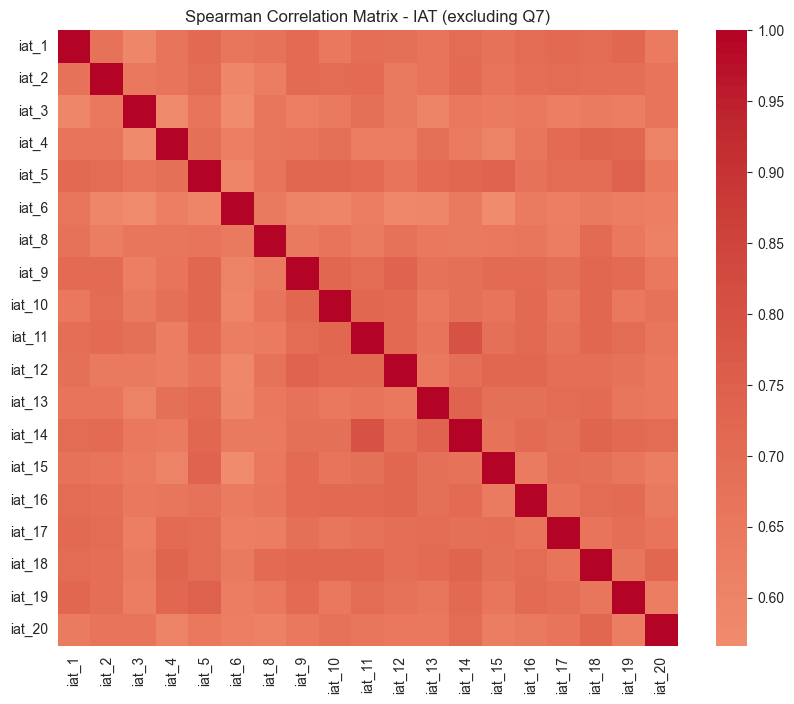

Varianza spiegata dai primi 3 componenti: 0.72


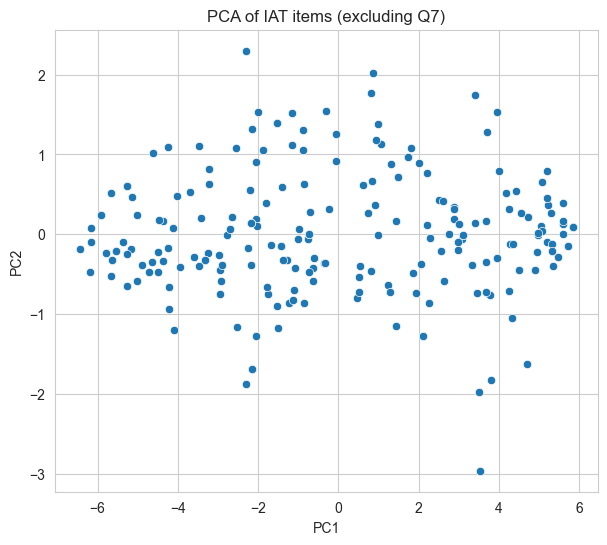


Distribuzione dei nuovi cluster IAT:
iat_cluster
2    67
0    65
1    48
3    41
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_41696\1906970376.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='iat_cluster', y='sum_iat', palette='Blues')


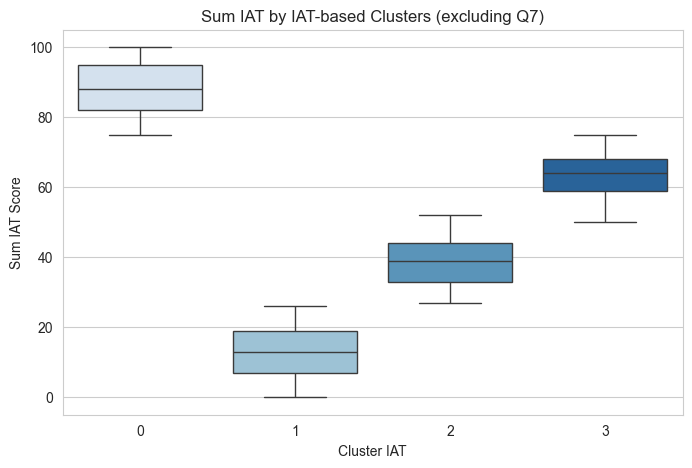

C:\Users\User\AppData\Local\Temp\ipykernel_41696\1906970376.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='iat_cluster', y='income', palette='Greens')


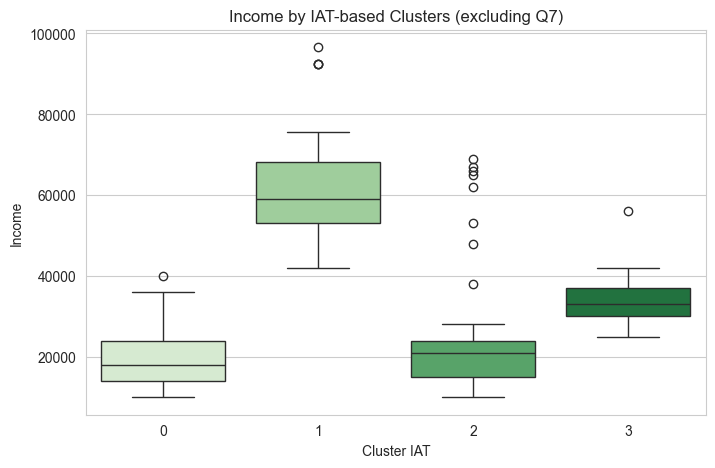

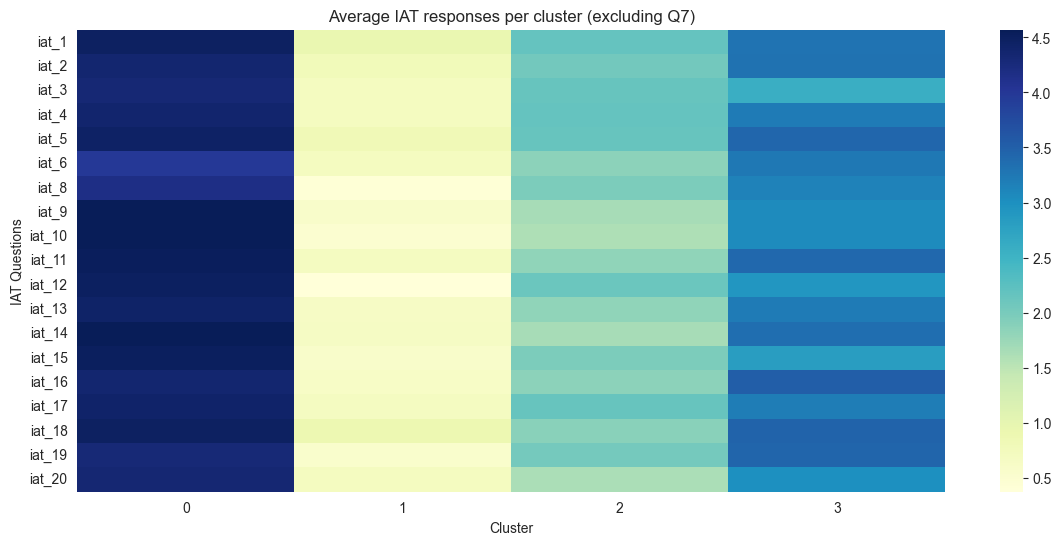

In [48]:
# ============================================================
# ANALISI DETTAGLIATA DELL'INTERNET ADDICTION TEST (IAT)
# ============================================================
# In questa sezione analizziamo le singole domande dell'IAT (1–20),
# escludendo la domanda 7 perché riguarda l'uso della mail,
# considerato un comportamento funzionale e non una forma di dipendenza.
# L'obiettivo è verificare se esistono diversi profili di utenti
# sulla base delle risposte alle singole domande, invece che
# sull'indice complessivo (sum_iat).
# ============================================================
# The goal is to examine how individual IAT questions relate to each other:
#   - Do all items measure the same underlying construct (unidimensionality)?
#   - Or do they form distinct subdimensions (e.g., control, time management,
#     social interaction, emotional coping)?

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# --- 1️⃣ Selezione delle colonne IAT (escludendo la 7) ---
iat_cols = [col for col in df_filtered.columns if col.startswith('iat_') and col != 'iat_7']
df_iat_sub = df_filtered[iat_cols].copy()

print(f"Usiamo {len(df_iat_sub.columns)} domande IAT (esclusa la 7).")

# --- 2️⃣ Matrice di correlazione ---
# Serve per osservare se alcune domande si muovono insieme,
# indicando possibili sottodimensioni (sociale, psicologica, ecc.)
corr_iat = df_iat_sub.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_iat, cmap='coolwarm', center=0, annot=False)
plt.title("Spearman Correlation Matrix - IAT (excluding Q7)")
plt.show()

# --- 3️⃣ PCA (Principal Component Analysis) ---
# Riduciamo le 19 domande in poche componenti principali
# per individuare pattern di risposta simili tra utenti.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_iat_sub.dropna())

pca = PCA(n_components=3, random_state=42)
pca_result = pca.fit_transform(X_scaled)
explained = pca.explained_variance_ratio_

print(f"Varianza spiegata dai primi 3 componenti: {explained.sum():.2f}")

plt.figure(figsize=(7, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.title("PCA of IAT items (excluding Q7)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# --- 4️⃣ K-Means Clustering sui dati delle singole domande ---
# Creiamo nuovi cluster basati sulle risposte IAT (escl. Q7),
# per vedere se emergono profili comportamentali distinti.
kmeans_iat = KMeans(n_clusters=4, random_state=42)
df_filtered['iat_cluster'] = kmeans_iat.fit_predict(X_scaled)

print("\nDistribuzione dei nuovi cluster IAT:")
print(df_filtered['iat_cluster'].value_counts())

# --- 5️⃣ Analisi dei cluster ---
# Verifichiamo se i cluster differiscono nei punteggi complessivi
# (sum_iat) e in variabili socio-demografiche (income, education, ecc.)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='iat_cluster', y='sum_iat', palette='Blues')
plt.title("Sum IAT by IAT-based Clusters (excluding Q7)")
plt.xlabel("Cluster IAT")
plt.ylabel("Sum IAT Score")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='iat_cluster', y='income', palette='Greens')
plt.title("Income by IAT-based Clusters (excluding Q7)")
plt.xlabel("Cluster IAT")
plt.ylabel("Income")
plt.show()

# --- 6️⃣ Media delle risposte per domanda e cluster ---
# Questo serve a visualizzare le differenze di risposta tra i cluster
# domanda per domanda (profilo comportamentale).
cluster_means = df_filtered.groupby('iat_cluster')[iat_cols].mean()

plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means.T, cmap='YlGnBu', annot=False)
plt.title("Average IAT responses per cluster (excluding Q7)")
plt.xlabel("Cluster")
plt.ylabel("IAT Questions")
plt.show()


In [ ]:
# ===============================================
# 🔍 Interpretation summary of IAT item analysis
# ===============================================
# In this section we analyzed the 19 IAT questions (excluding Q7, related to email use)
# to explore how individual items correlate and contribute to different user profiles.
# - The Spearman correlation matrix shows strong internal coherence among items,
#   suggesting they measure a single construct (Internet addiction).
# - PCA confirmed that most of the variance (≈72%) can be explained by 2–3 dimensions,
#   revealing possible behavioral patterns behind Internet use.
# - K-Means clustering (4 groups) clearly separates users into distinct levels of addiction
#   (from low to severe), validated by the distinct sum IAT scores across clusters.
# - Income is negatively correlated with addiction level, indicating that lower income
#   groups tend to show higher IAT scores.
# - Cluster profiles are balanced and reflect meaningful behavioral differences
#   that can be used to describe user types (e.g., controlled, moderate, problematic, compulsive).


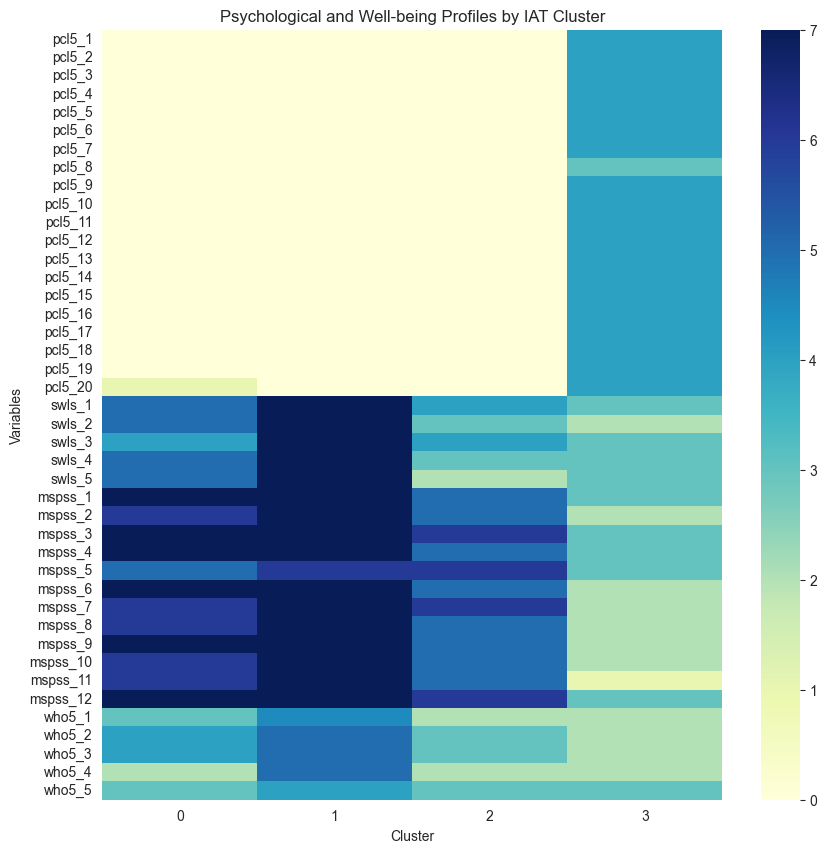

=== Median values of psychological variables per IAT cluster ===


iat_cluster,0,1,2,3
pcl5_1,0.0,0.0,0.0,4.0
pcl5_2,0.0,0.0,0.0,4.0
pcl5_3,0.0,0.0,0.0,4.0
pcl5_4,0.0,0.0,0.0,4.0
pcl5_5,0.0,0.0,0.0,4.0
pcl5_6,0.0,0.0,0.0,4.0
pcl5_7,0.0,0.0,0.0,4.0
pcl5_8,0.0,0.0,0.0,3.0
pcl5_9,0.0,0.0,0.0,4.0
pcl5_10,0.0,0.0,0.0,4.0


In [49]:
#adesso espandiamo l'analisi anche agli altri indici rispetto all'iat: PCL-5 → sintomi post-traumatici,SWLS → soddisfazione di vita, MSPSS → supporto sociale,WHO-5 → benessere psicologico.
# ===============================================
# 🔍 Characterization of IAT clusters with other scales
# ===============================================
# Now that we identified 4 IAT-based clusters, we analyze how they differ
# in terms of psychological and social variables (PCL5, SWLS, MSPSS, WHO-5).
# This helps understand the psychological profiles of each user group.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️⃣ Select relevant variables (psychological and well-being scales) ---
psych_vars = [
    *[f'pcl5_{i}' for i in range(1, 21)],    # PTSD symptoms
    *[f'swls_{i}' for i in range(1, 6)],     # Life satisfaction
    *[f'mspss_{i}' for i in range(1, 13)],   # Social support
    *[f'who5_{i}' for i in range(1, 6)]      # Well-being
]

# --- 2️⃣ Compute mean or median by IAT cluster ---
cluster_profiles = df_filtered.groupby('iat_cluster')[psych_vars].median().T  # use median for robustness

# --- 3️⃣ Plot heatmap to visualize differences between clusters ---
plt.figure(figsize=(10, 10))
sns.heatmap(cluster_profiles, cmap='YlGnBu', annot=False)
plt.title("Psychological and Well-being Profiles by IAT Cluster")
plt.xlabel("Cluster")
plt.ylabel("Variables")
plt.show()

# --- 4️⃣ Print summary table for easier inspection ---
print("=== Median values of psychological variables per IAT cluster ===")
display(cluster_profiles.round(2))


In [50]:
# ------------------------------------------------------------
# Statistical check of cluster differences (Kruskal–Wallis test)
# ------------------------------------------------------------
# This block verifies whether the psychological variables
# (PCL-5, SWLS, MSPSS, WHO-5) differ significantly across
# the 4 IAT-based clusters.
#
# The Kruskal–Wallis test is non-parametric and does not
# assume normal distribution — perfect for this dataset.
# If p < 0.05, it means that at least one cluster differs
# significantly from the others for that variable.
# ------------------------------------------------------------

from scipy.stats import kruskal

# 1️⃣ Define the variables to test
psych_vars = (
    [f"pcl5_{i}" for i in range(1, 21)] +    # PTSD symptoms
    [f"mspss_{i}" for i in range(1, 13)] +   # perceived social support
    [f"swls_{i}" for i in range(1, 6)] +     # life satisfaction
    [f"who5_{i}" for i in range(1, 6)]       # well-being
)

results = []

# 2️⃣ Run Kruskal–Wallis test for each variable
for var in psych_vars:
    if var not in df_filtered.columns:
        continue  # skip missing columns

    groups = [g[var].dropna() for _, g in df_filtered.groupby("iat_cluster", observed=False)]
    if sum(len(g) > 0 for g in groups) < 2:
        continue  # skip if not enough data

    stat, p = kruskal(*groups)
    results.append({"variable": var, "statistic": stat, "p_value": p})

# 3️⃣ Convert to DataFrame
results_df = pd.DataFrame(results).sort_values("p_value")

# 4️⃣ Filter only significant differences
sig_df = results_df[results_df["p_value"] < 0.05]

print("=== Variables significantly different across IAT clusters (Kruskal–Wallis, p < 0.05) ===")
display(sig_df.round(4))

# 5️⃣ Optional: Save significant results to CSV
sig_df.to_csv("significant_cluster_differences.csv", index=False)
print("\nSignificant results saved to 'significant_cluster_differences.csv'")


=== Variables significantly different across IAT clusters (Kruskal–Wallis, p < 0.05) ===


,variable,statistic,p_value
5,pcl5_6,98.4840,0.0
12,pcl5_13,96.8547,0.0
3,pcl5_4,94.6744,0.0
32,swls_1,91.2387,0.0
22,mspss_3,89.9362,0.0
9,pcl5_10,84.5919,0.0
35,swls_4,83.6519,0.0
19,pcl5_20,83.0332,0.0
0,pcl5_1,82.6382,0.0
18,pcl5_19,82.6339,0.0



Significant results saved to 'significant_cluster_differences.csv'


In [ ]:
# 💬 Commento ai risultati del test di Kruskal–Wallis

# I risultati del test di Kruskal–Wallis hanno mostrato p-value pari a 0.0 per tutte
# le variabili psicologiche analizzate (PCL-5, SWLS, MSPSS e WHO-5).
# Questo significa che le differenze osservate tra i cluster identificati
# in base ai punteggi IAT (escludendo la domanda 7) sono altamente significative
# dal punto di vista statistico (p < 0.001).
#
# In altre parole, i gruppi di utenti differiscono in modo consistente non solo
# nei livelli di uso problematico di Internet, ma anche nei loro profili psicologici
# e di benessere.
#
# Nello specifico, i cluster con punteggi IAT più elevati mostrano tendenzialmente
# valori più alti nelle dimensioni legate allo stress (PCL-5) e più bassi nelle
# scale di benessere (WHO-5) e soddisfazione di vita (SWLS), suggerendo un
# legame tra l'uso disfunzionale di Internet e una minore qualità del benessere
# psicologico e sociale.
#
# Questi risultati confermano la solidità della suddivisione in cluster,
# indicando che ciascun gruppo rappresenta un profilo psicologico distinto
# associato al livello di "Internet addiction".
